<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-датасетов-и-получение-общей-информации" data-toc-modified-id="Загрузка-датасетов-и-получение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка датасетов и получение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Блок-функциий-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Блок-функциий-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Блок функциий для расчёта и анализа LTV, ROI, удержания и конверсии</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Анализ-маркетинга" data-toc-modified-id="Анализ-маркетинга-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ маркетинга</a></span></li><li><span><a href="#Оценка-окупаемости-рекламы" data-toc-modified-id="Оценка-окупаемости-рекламы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Оценка окупаемости рекламы</a></span><ul class="toc-item"><li><span><a href="#Графики-LTV,-CAC-и-ROI" data-toc-modified-id="Графики-LTV,-CAC-и-ROI-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Графики LTV, CAC и ROI</a></span></li><li><span><a href="#Графики-конверсии-и-удержания" data-toc-modified-id="Графики-конверсии-и-удержания-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Графики конверсии и удержания</a></span></li><li><span><a href="#Графики-LTV,-CAC-и-ROI-с-разбивкой-по-странам" data-toc-modified-id="Графики-LTV,-CAC-и-ROI-с-разбивкой-по-странам-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Графики LTV, CAC и ROI с разбивкой по странам</a></span></li><li><span><a href="#Графики-LTV,-CAC-и-ROI-с-разбивкой-по-устройствам" data-toc-modified-id="Графики-LTV,-CAC-и-ROI-с-разбивкой-по-устройствам-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Графики LTV, CAC и ROI с разбивкой по устройствам</a></span></li><li><span><a href="#Графики-LTV,-CAC-и-ROI-с-разбивкой-по-рекламным-каналам" data-toc-modified-id="Графики-LTV,-CAC-и-ROI-с-разбивкой-по-рекламным-каналам-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Графики LTV, CAC и ROI с разбивкой по рекламным каналам</a></span></li><li><span><a href="#Итоговая-оценка" data-toc-modified-id="Итоговая-оценка-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Итоговая оценка</a></span></li></ul></li><li><span><a href="#Моделирование-бизнеса" data-toc-modified-id="Моделирование-бизнеса-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Моделирование бизнеса</a></span></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

# Исследовательский анализ приложения Procrastinate Pro+.

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания развлекательного приложения Procrastinate Pro+ терпит убытки. Целью проекта является идентификация причин экономических убытков и определение вариантов для вывода компании в плюс.


<b> В распоряжении имеются три датасета:</b> 

**1. visits_info_short.csv:**
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

**2. orders_info_short.csv:**
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

**3. costs_info_short.csv:**
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

### Загрузка датасетов и получение общей информации

In [2]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
# Загрузка файлов с локального ПК и сети
try:
    visits, orders, costs = (pd.read_csv('D:\Учеба\Аналитик данных\Проекты\Проект 6 Procrastinate Pro+\\visits_info_short.csv'),
                             pd.read_csv('D:\Учеба\Аналитик данных\Проекты\Проект 6 Procrastinate Pro+\\orders_info_short.csv'),
                             pd.read_csv('D:\Учеба\Аналитик данных\Проекты\Проект 6 Procrastinate Pro+\\costs_info_short.csv')
                            )
except:
    visits, orders, costs = (pd.read_csv('/datasets/visits_info_short.csv'),
                             pd.read_csv('/datasets/orders_info_short.csv'),
                             pd.read_csv('/datasets/costs_info_short.csv')
                            )                   

In [4]:
# Создадим функцию для получения общей информации о датафрейме
def info(data):
    display(data.head())
    display(data.info())
    display(data.isna().sum())
    print(f'Количество полных дубликатов: {data.duplicated().sum()}')

In [5]:
# Применим созданную функцию к первому датафрейму
info(visits)

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Количество полных дубликатов: 0


<div style="border:solid Green 2px; padding: 20px">
    
В датафрейме `visits` определена проблема с типом данных: столбцы "Session Start" и "Session End" требуют корректировки с типа "object" на "datetime". Также можно привести название столобцов к соответствию стилистике Python. В остальном датафрейм можно считать корректным для дальнейшего анализа.

In [6]:
# Применим созданную функцию ко второму датафрейму
info(orders)

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

User Id     0
Event Dt    0
Revenue     0
dtype: int64

Количество полных дубликатов: 0


<div style="border:solid Green 2px; padding: 20px">
    
В датафрейме `orders` также присутствует проблема с типом данных: столбец "Event Dt" требует корректировки с типа "object" на "datetime". Аналогично про название столобцов - стилистика Python. В остальном датафрейм можно считать корректным для дальнейшего анализа.

In [7]:
# Применим созданную функцию к третьему датафрейму
info(costs)

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

dt         0
Channel    0
costs      0
dtype: int64

Количество полных дубликатов: 0


<div style="border:solid Green 2px; padding: 20px">
    
В датафрейме `costs` вновь присутствует проблема с типом данных: столбец "dt" требует корректировки с типа "object" на "datetime". Аналогично про название столобцов - стилистика Python. В остальном датафрейм можно считать корректным для дальнейшего анализа.
    
**Вывод:**
- исправление названий столбцов
- `visits` корректировка типа данных столбцов "Session Start", "Session End"
- `orders` корректировка типа данных столбца "Event Dt"
- `costs` корректировка типа данных столбца "dt"

### Предобработка данных

In [8]:
# Создадим функцию для корректировки названия столбцов
def column_style(data):
    data.columns = data.columns.str.replace(' ', '_')
    data.columns = data.columns.str.lower()

In [9]:
# Применяем функцию к датафреймам
for data in [visits, orders, costs]:
    column_style(data)

In [10]:
# Корректируем тип данных в ранее определенных столбцах
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

<div style="border:solid Green 2px; padding: 20px">

**Вывод:**

Данные подготовлены для дальнейшей работы: скорректирован тип данных, название столбцов поправлено в соответствии со стилистическими нормами.

### Блок функциий для расчёта и анализа LTV, ROI, удержания и конверсии

In [11]:
# Определим функцию для создания пользовательских профилей с информацией о дате, "канале", устройстве, 
# регионе, стоимости его привлечения и пометке является ли пользователь плательщиком

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца и неделю, когда это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['week'] = profiles['first_ts'].dt.isocalendar().week

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [12]:
# Создадим функцию для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [13]:
# Создадим функцию для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [14]:
# Создадим функцию для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [15]:
# Создадим функцию для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [16]:
# Создадим функцию для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [17]:
# Создадим функцию для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [18]:
# Создадим функцию для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

In [19]:
# Получим профили пользователей с детальной информацией о их привлечении
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  week  payer  acquisition_cost  
0  2019-05-07 2019-05-01    19   True          1.088172  
1  2019-07-09 2019-07-01    28  False          1.107237  
2  2019-10-01 2019-10-01    40  False          0.000000  
3  2019-08-22 2019-08-01    34  False          0.988235  
4  2019-10-02 2019-10-01    40  False          0.230769

In [20]:
# Определим максимальную и минимальную даты привлечения пользователей
max_date = profiles['first_ts'].dt.date.max()
min_date = profiles['first_ts'].dt.date.min()

print(f'Максимальная и минимальная даты привлечения пользователей соответственно: {max_date} и {min_date}')

Максимальная и минимальная даты привлечения пользователей соответственно: 2019-10-27 и 2019-05-01


<div style="border:solid Green 2px; padding: 20px">

Получена таблица профелей пользователей со всей необходимой информацией. Максимальная и минимальная даты привлечения пользователей соответствуют датам, указанным в исходных данных.

In [21]:
# Оценим количество и долю платящих пользователей из разных стран
profiles.groupby('region')\
        .agg({'user_id':'nunique', 'payer':'mean'})\
        .sort_values(by = 'payer', ascending = False)

user_id     payer
region                          
United States   100002  0.069019
Germany          14981  0.041119
UK               17575  0.039829
France           17450  0.037994

<div style="border:solid Green 2px; padding: 20px">

По представленным данным пользователи приходят из 4 стран: США, Германия, Великобритания и Франция. Больше всего пользователей привлечено из США: 100 тысяч. Также здесь самый большой процент платящих пользователей - почти 7%, в то время как в других странах он составляет 4%.

In [22]:
# Оценим количество и долю платящих пользователей с разбивкой по устройствам
profiles.groupby('device')\
.agg({'user_id':'nunique', 'payer':'mean'})\
.sort_values(by = 'user_id', ascending = False)

user_id     payer
device                    
iPhone     54479  0.062079
Android    35032  0.058518
PC         30455  0.050468
Mac        30042  0.063644

<div style="border:solid Green 2px; padding: 20px">

Лидирующее устройство это iPhone - значительный отрыв в количестве привлеченны пользователей, а также высокая доля платящих пользователей: более 6%. Хуже всего себя показывает ПК - самая низкая доля платящих пользователей, а также нижняя граница по количеству привлеченных пользователей.

In [23]:
# Оценим общее количество и количество платящих пользователей с разбивкой по каналам привлечения
table_channel = (profiles.groupby('channel')
                 .agg({'user_id':'nunique', 'payer':'mean'})
                )

table_channel.columns = ['users', 'share_payers']

table_channel.insert(loc = 1,  # Добавим столбец с расчетом явного количества платящих пользователей
                     column = 'payers', 
                     value = (table_channel['users'] * table_channel['share_payers']).astype(int)
                    )

table_channel.sort_values(by = 'share_payers', ascending = False)

users  payers  share_payers
channel                                        
FaceBoom            29144    3557      0.122049
AdNonSense           3880     440      0.113402
lambdaMediaAds       2149     225      0.104700
TipTop              19561    1878      0.096007
RocketSuperAds       4448     352      0.079137
WahooNetBanner       8553     453      0.052964
YRabbit              4312     165      0.038265
MediaTornado         4364     156      0.035747
LeapBob              8553     262      0.030633
OppleCreativeMedia   8605     233      0.027077
organic             56439    1160      0.020553

<div style="border:solid Green 2px; padding: 20px">

Всего определено 10 каналов привлечения, а также естественный "канал" organic, который в целом показывает неплохой результат в сравнении с конкурентами, если оценивать по количеству платящих пользователей, однако конверсия в платящих пользователей крайне мала. 
    
Касаемо рекламных каналов, абсолютным лидером является FaceBoom: значительный отрыв по количеству как привлеченных пользователей, так и платящих пользователей. Также хорошие показатели имеет TipTop.  
    
**Вывод:**
    
По предварительному анализу можно выделить наиболее результативные и перспективные позиции:
- Страна США
- Устройство iPhone
- Канал привлечения FaceBoom
    
Однако для подтверждения данных выводов необходимо провести более глубокое исследование с учетом бизнес - показателей.

### Анализ маркетинга

In [24]:
# Определим общие, совокупные траты на маркетинг с учетом проверки
display('Общие затраты на маркетинг: {}'.format(profiles['acquisition_cost'].sum()))
'Проверка общих затрат: {}'.format(costs['costs'].sum())  # Проверка

'Общие затраты на маркетинг: 105497.29999999999'

'Проверка общих затрат: 105497.30000000002'

In [25]:
# Рассмотрим распределение трат по рекламным кампаниям
spend = profiles.groupby('channel')\
                .agg({'acquisition_cost':'sum'})\
                .sort_values('acquisition_cost', ascending = False)

# Добавим столбец с процентом от общих трат
spend['share_spend, %'] = round(spend['acquisition_cost'] / costs['costs'].sum() * 100, 1)

spend

acquisition_cost  share_spend, %
channel                                             
TipTop                      54751.30            51.9
FaceBoom                    32445.60            30.8
WahooNetBanner               5151.00             4.9
AdNonSense                   3911.25             3.7
OppleCreativeMedia           2151.25             2.0
RocketSuperAds               1833.00             1.7
LeapBob                      1797.60             1.7
lambdaMediaAds               1557.60             1.5
MediaTornado                  954.48             0.9
YRabbit                       944.22             0.9
organic                         0.00             0.0

<div style="border:solid Green 2px; padding: 20px">

Всего на рекламные кампании было потрачено более 105 тысяч, из которых больше половины заплатили компании "TipTop". Учитывая то, что данная компания не является лидером по количетсву привлеченных пользователей, ее эффективность уже можно поставить под вопрос и предположить гипотезу о неэффективном маркетинге. <br> Также выделятеся ранее определенный лидер "FaceBoom", однако в данном случае суммарные траты значительно меньше, а вот эффективность привлечения выше. Нужны дополнительные метрики и анализ в динамике.

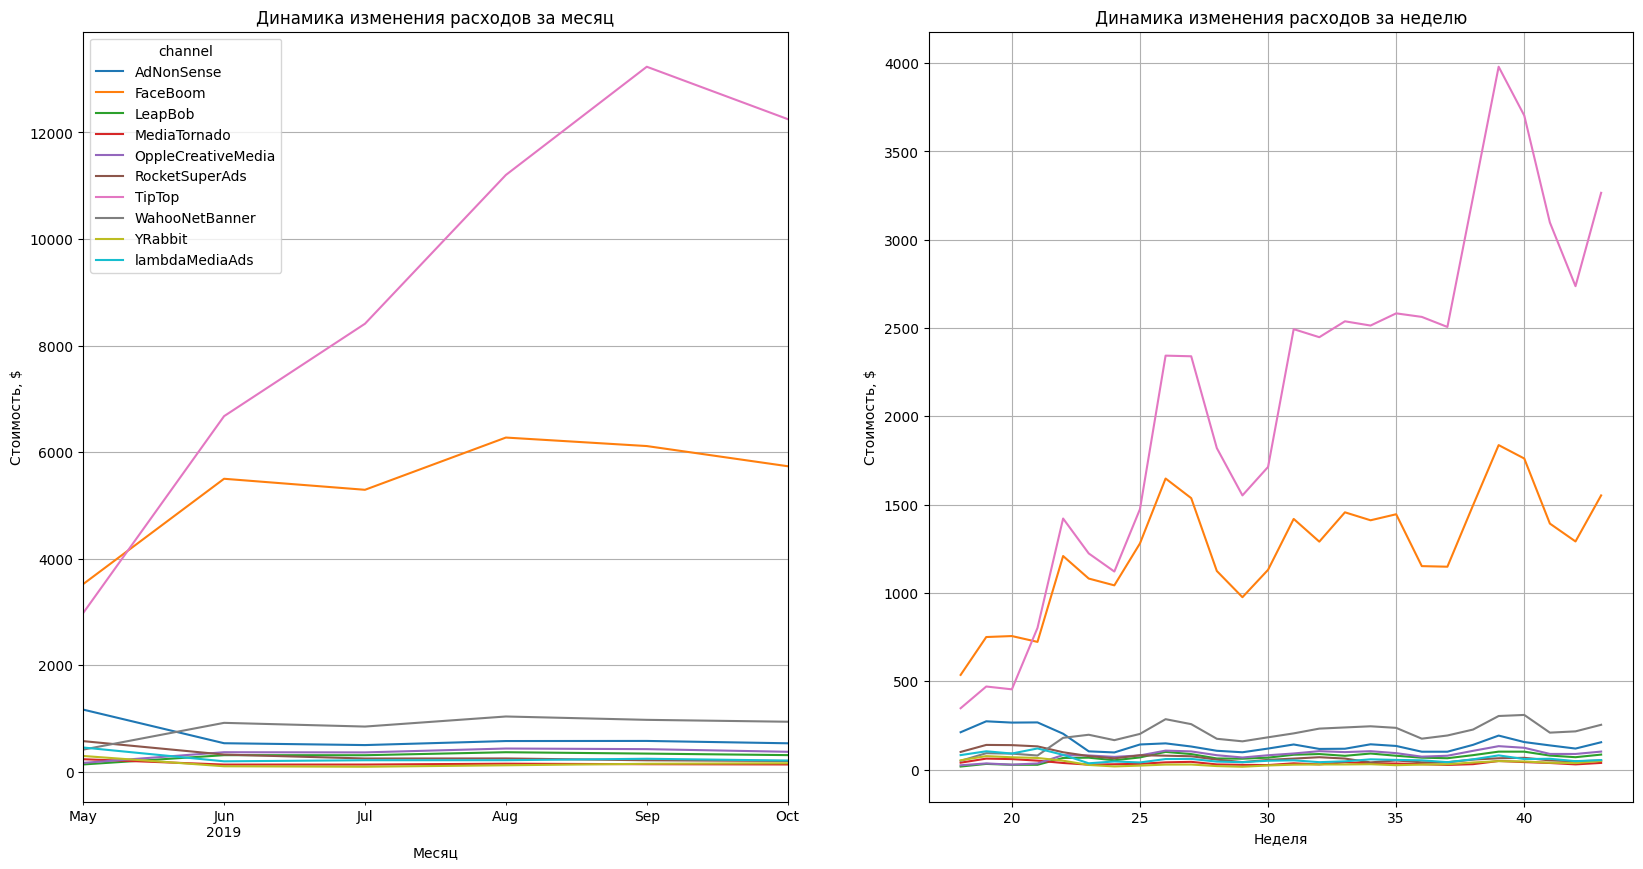

In [26]:
# Визуализируем динамику изменения расходов во времени
plt.figure(figsize=(20, 10))

profiles.pivot_table(index = 'month',  # Один график - месячная динамика
                     columns = 'channel', 
                     values = 'acquisition_cost', 
                     aggfunc = 'sum')\
        .drop(columns = 'organic')\
        .plot(grid = True, ax = plt.subplot(1,2,1))
plt.title('Динамика изменения расходов за месяц')
plt.xlabel('Месяц')
plt.ylabel('Стоимость, $')

profiles.pivot_table(index = 'week',  # Второй график - недельная динамика
                     columns = 'channel', 
                     values = 'acquisition_cost', 
                     aggfunc = 'sum')\
        .drop(columns = 'organic')\
        .plot(grid = True, ax = plt.subplot(1,2,2))
plt.title('Динамика изменения расходов за неделю')
plt.xlabel('Неделя')
plt.ylabel('Стоимость, $')
plt.legend().remove()

plt.show()

<div style="border:solid Green 2px; padding: 20px">

На обоих графиках явно выделяются каналы "TipTop" и "FaceBoom" - постоянная тенденция к увеличению стоимости рекламы в течение всего времени с небольшими колебаниями. Рост стоимости составил от 500 до 1500 и 4000 в неделю по данным каналам. <br> Остальные рекламные кампании имеют стабильную стоимость на всем временном промежутке, без аномального роста.

In [27]:
# Оценим "среднюю стоимость" одного пользователя из каждого канала привлечения
cac = profiles.groupby('channel')\
              .agg({'acquisition_cost':'mean'})\
              .sort_values('acquisition_cost', ascending = False)

# Добавим средний показатель CAC по всем привлеченным пользователям
cac['mean_cac'] = profiles.query('channel != "organic"')['acquisition_cost'].mean()


cac.drop('organic', axis = 0)

acquisition_cost  mean_cac
channel                                       
TipTop                      2.799003  1.127481
FaceBoom                    1.113286  1.127481
AdNonSense                  1.008054  1.127481
lambdaMediaAds              0.724802  1.127481
WahooNetBanner              0.602245  1.127481
RocketSuperAds              0.412095  1.127481
OppleCreativeMedia          0.250000  1.127481
YRabbit                     0.218975  1.127481
MediaTornado                0.218717  1.127481
LeapBob                     0.210172  1.127481

<div style="border:solid Green 2px; padding: 20px">

Результат довольно предсказуемый: самые дорогие пользователи были привлечены посредством рекламной компании "TipToр".
    
**Вывод:**
    
Больше всего (порядка 85%) маркетинговых затрат идет на 2 рекламные компании: "TipTop" и "FaceBoom". Также важным фактором является значительная тенденция к росту стоимости у данных каналов. Расходы на "FaceBoom" меньше, чем на "TipTop", однако эффективность первой компании выше, чем второй. Необходимо проверить окупаемость каналов, чтобы сделать окончательные выводы.

### Оценка окупаемости рекламы

In [28]:
# Установим момент и горизонт анализа исходя из исходных данных
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14 

#### Графики LTV, CAC и ROI

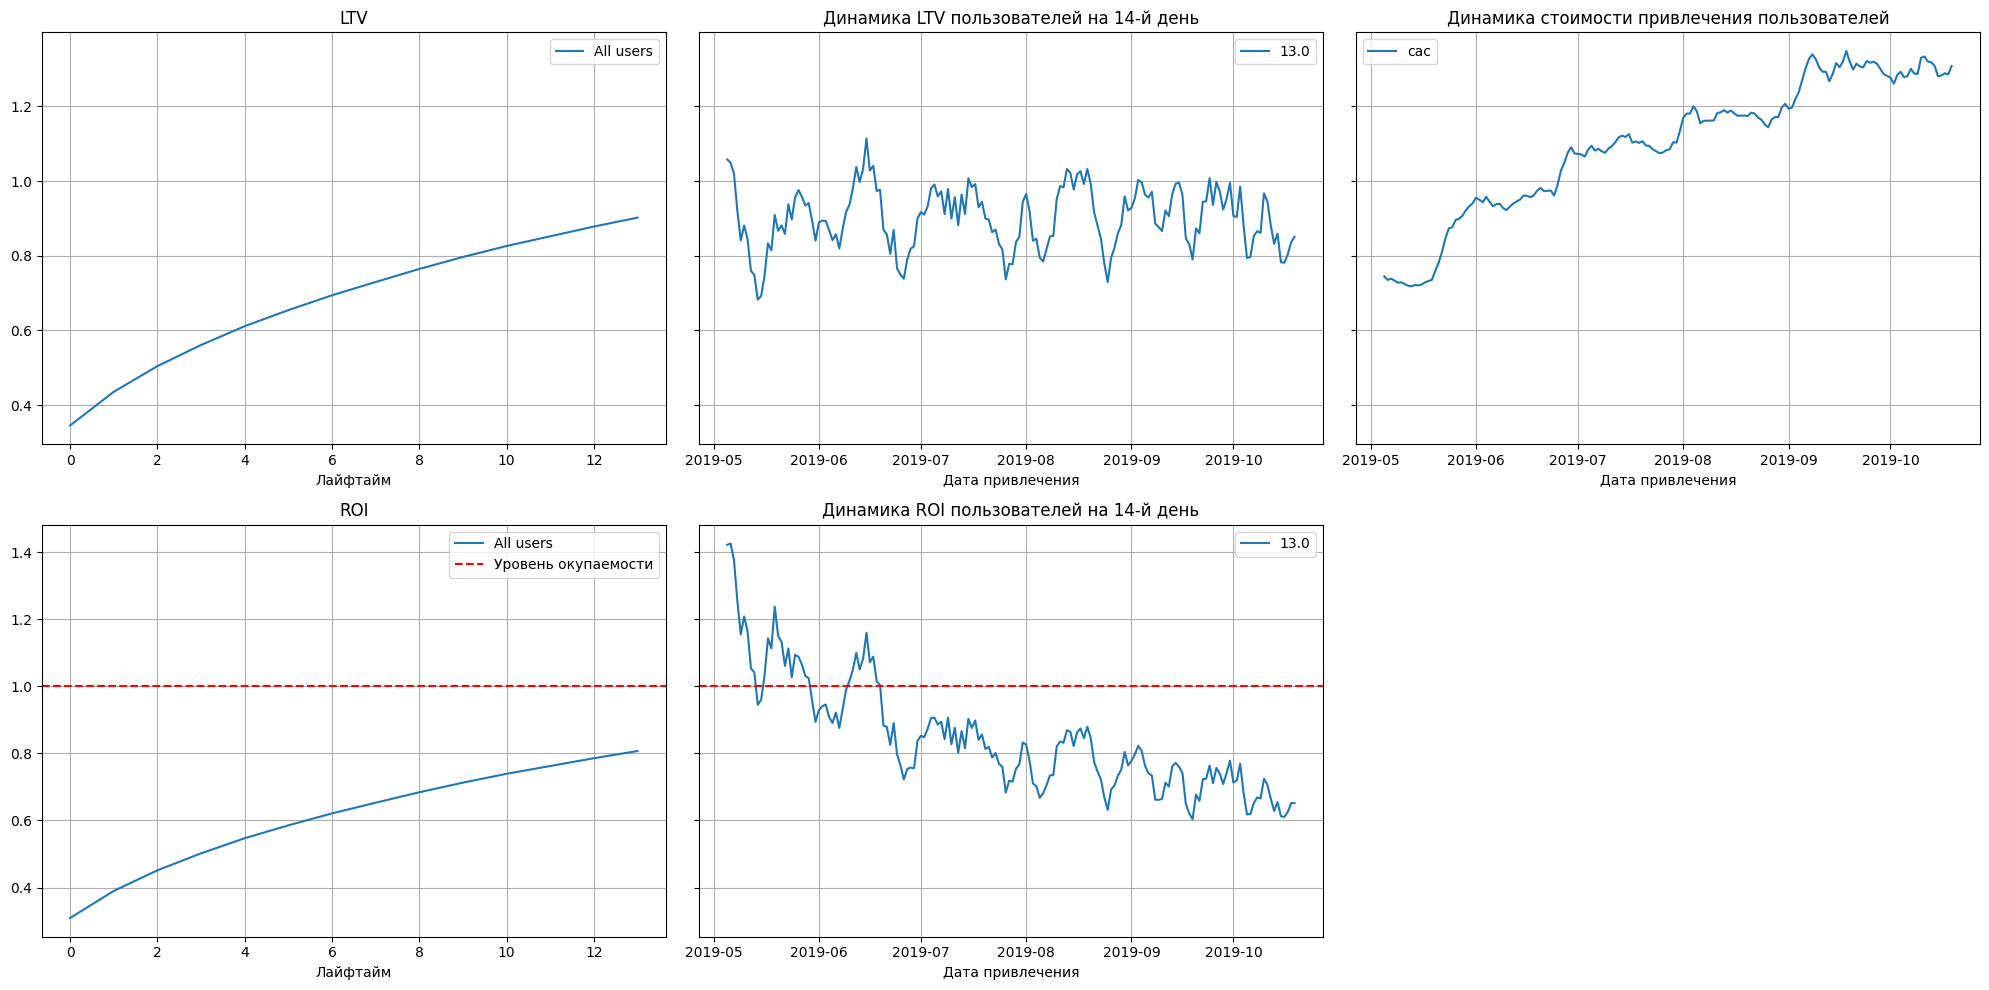

In [29]:
# Вызовем функцию для расчета LTV, ROI и данных показателей в динамике исключив органических пользователей
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles.query('channel != "organic"'), 
                                                         orders, observation_date, horizon_days)

# Визуализируем полученные показатели на графиках
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=5)

<div style="border:solid Green 2px; padding: 20px">

Прежде всего снова отмечается рост стоимости привлечения пользователей, что в значительной степени сказывается на ROI. Реклама окупается только на 80% к концу второй недели, а положительная зона динамики ROI отмечается в самом начале временного периода и очень быстро стремится в зону убыточную. Графики динамики демонстрируют ситуацию, что раньше было лучше: реклама сильно дорожает, денег уходит больше, а выручки нет. <br>

#### Графики конверсии и удержания

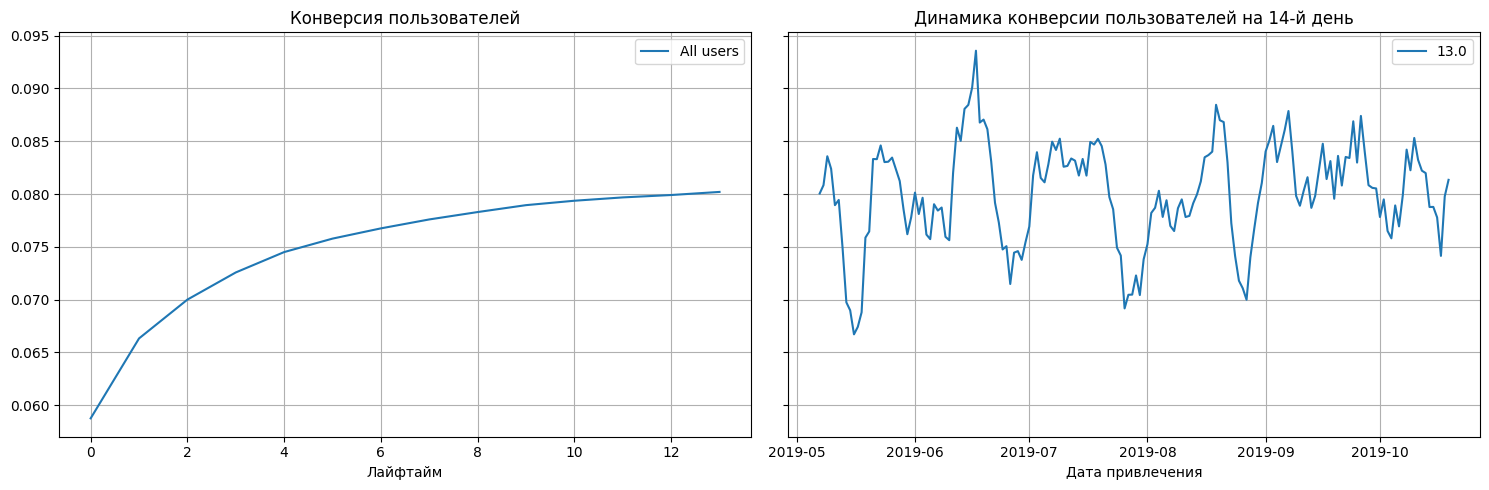

In [30]:
# Вызовем функцию для расчета конверсии, исключив органических пользователей
conversion_raw, conversion, conversion_in_time = get_conversion(profiles.query('channel != "organic"'), 
                                                                orders, observation_date, horizon_days)

# Визуализируем конверсию и динамику конверсии на конец 2 недели
plot_conversion(conversion, conversion_in_time, horizon_days, window=7)

<div style="border:solid Green 2px; padding: 20px">

На 14 день конверсия пользователей доходит до 8% - это очень хороший показатель, учитывая, что уже на 2 день он стремится к 7%. По динамике видны провалы, но не существенные - в среднем до 7%. Также отмечаются и пиковые колебания до 8,5 - 9%. <br>
Также стоит учитывать низкую конверсию органических пользователей: из 56 тысяч пользователей, покупку соврешили всего более тысячи клиентов. Органические пользователи конверстируются значительно хуже - для наглядиности визуализируем всю совокупность клиентов.

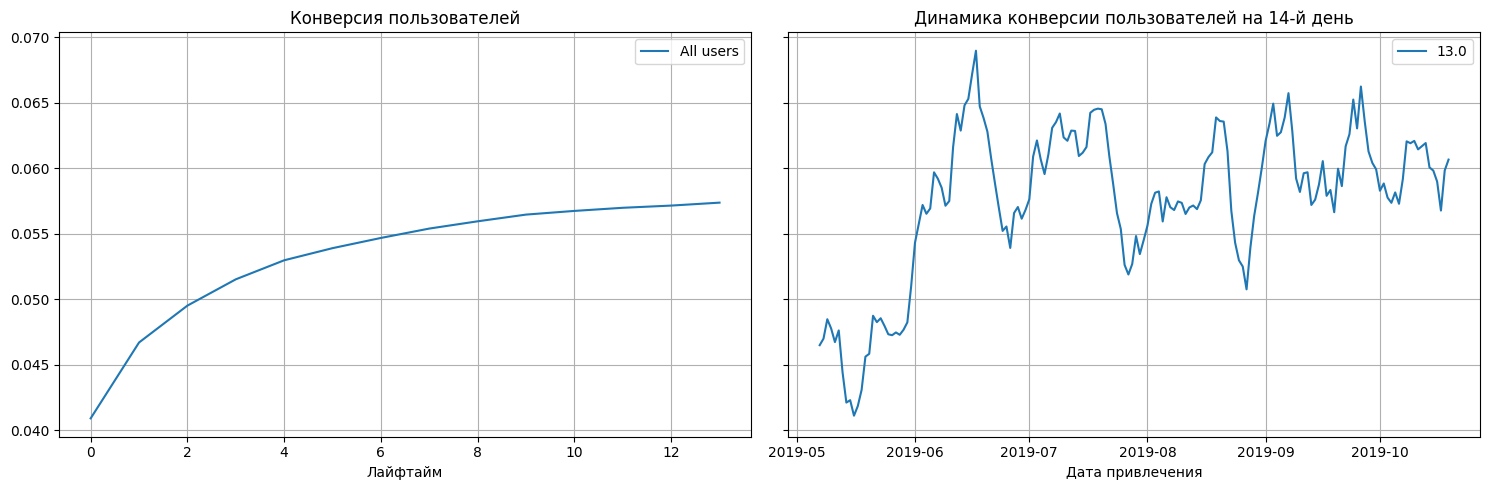

In [31]:
# Вызовем функцию для расчета конверсии
conversion_raw, conversion, conversion_in_time = get_conversion(profiles, orders, observation_date, horizon_days)

# Визуализируем конверсию и динамику конверсии на конец 2 недели
plot_conversion(conversion, conversion_in_time, horizon_days, window=7)

<div style="border:solid Green 2px; padding: 20px">

Показатель не превышает 6%, а также отмечается значительная просадка по динамике в мае: конверсия колебалась в районе 4,5%. Этот нисходящий трент в середине мая прослеживается и на рекламных пользователях - оно и отразилось на общей конверсии, опустив показатель до аномально низких значений, менее 4,5%.

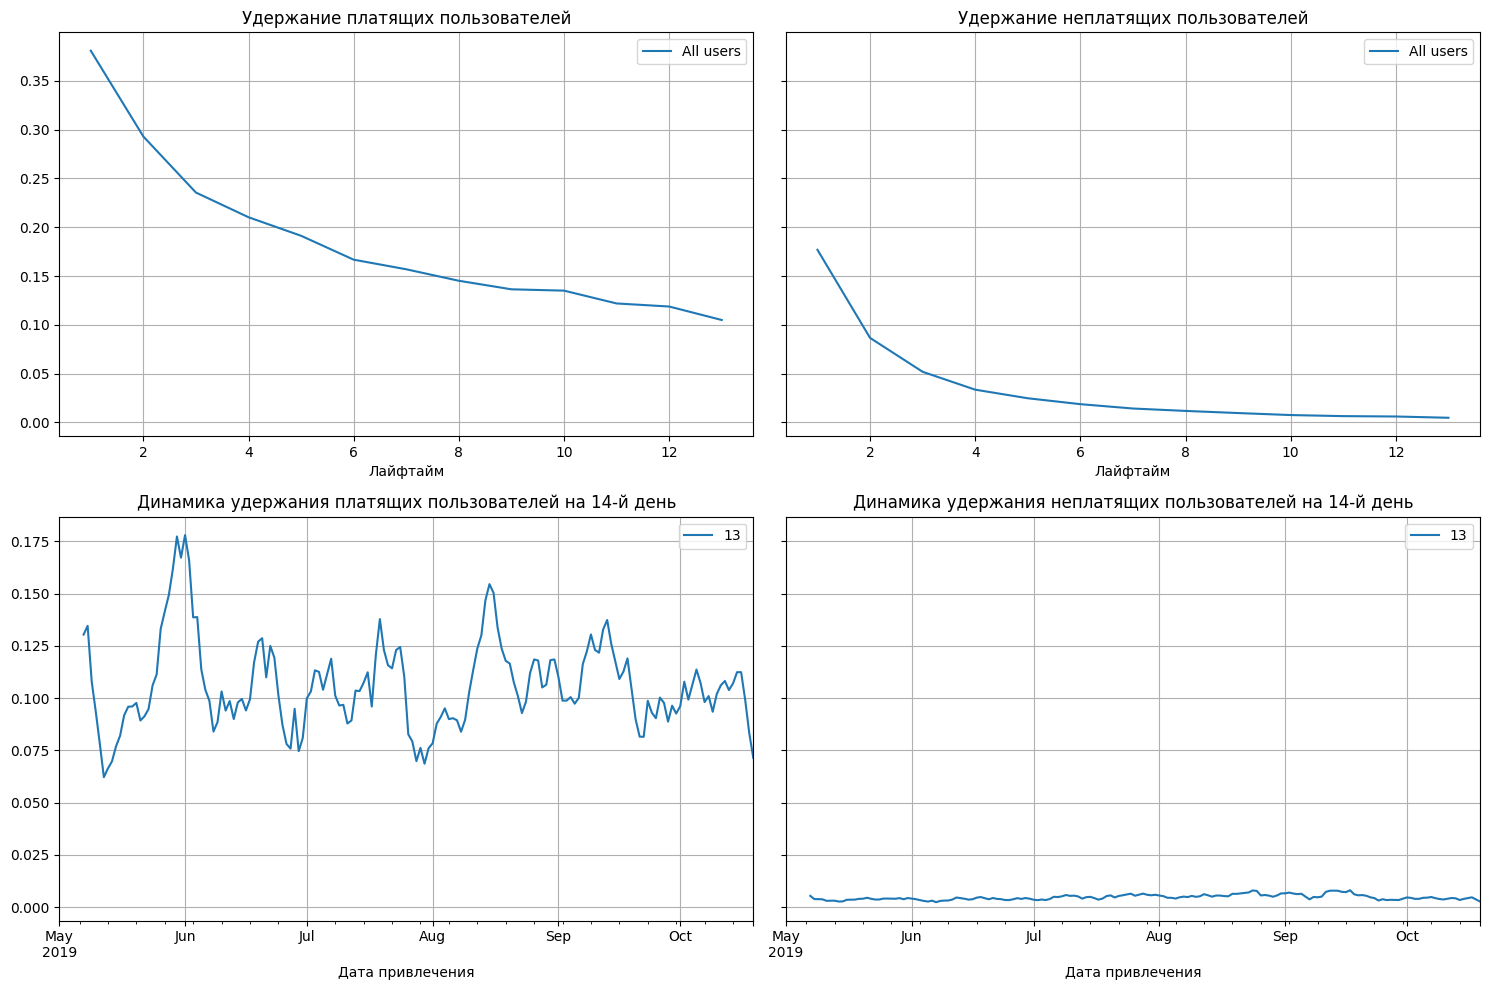

In [32]:
# Вызовем функцию для расчета удержания, исключив органических пользователей
retention_raw, retention, retention_in_time = get_retention(profiles.query('channel != "organic"'), 
                                                            visits, observation_date, horizon_days)

# Визуализируем удержание и динамику удержания на конец 2 недели
plot_retention(retention, retention_in_time, horizon_days, window=7)

<div style="border:solid Green 2px; padding: 20px">

Удержание платящих пользователей значительно выше, чем неплатящих, причем удержание последних стабильно на все временном периоде и стремится к 0 на конец второй недели. Касаемо платящих пользователей - их остается в среднем 10% к 14 дню, с колебаниями в диапазоне от 7,5% до 17,5%, что также является довольно низким показателем. К концу первой недели остается менее 20% платящих пользователей - клиенты очень быстро уходят из приложения.

#### Графики LTV, CAC и ROI с разбивкой по странам

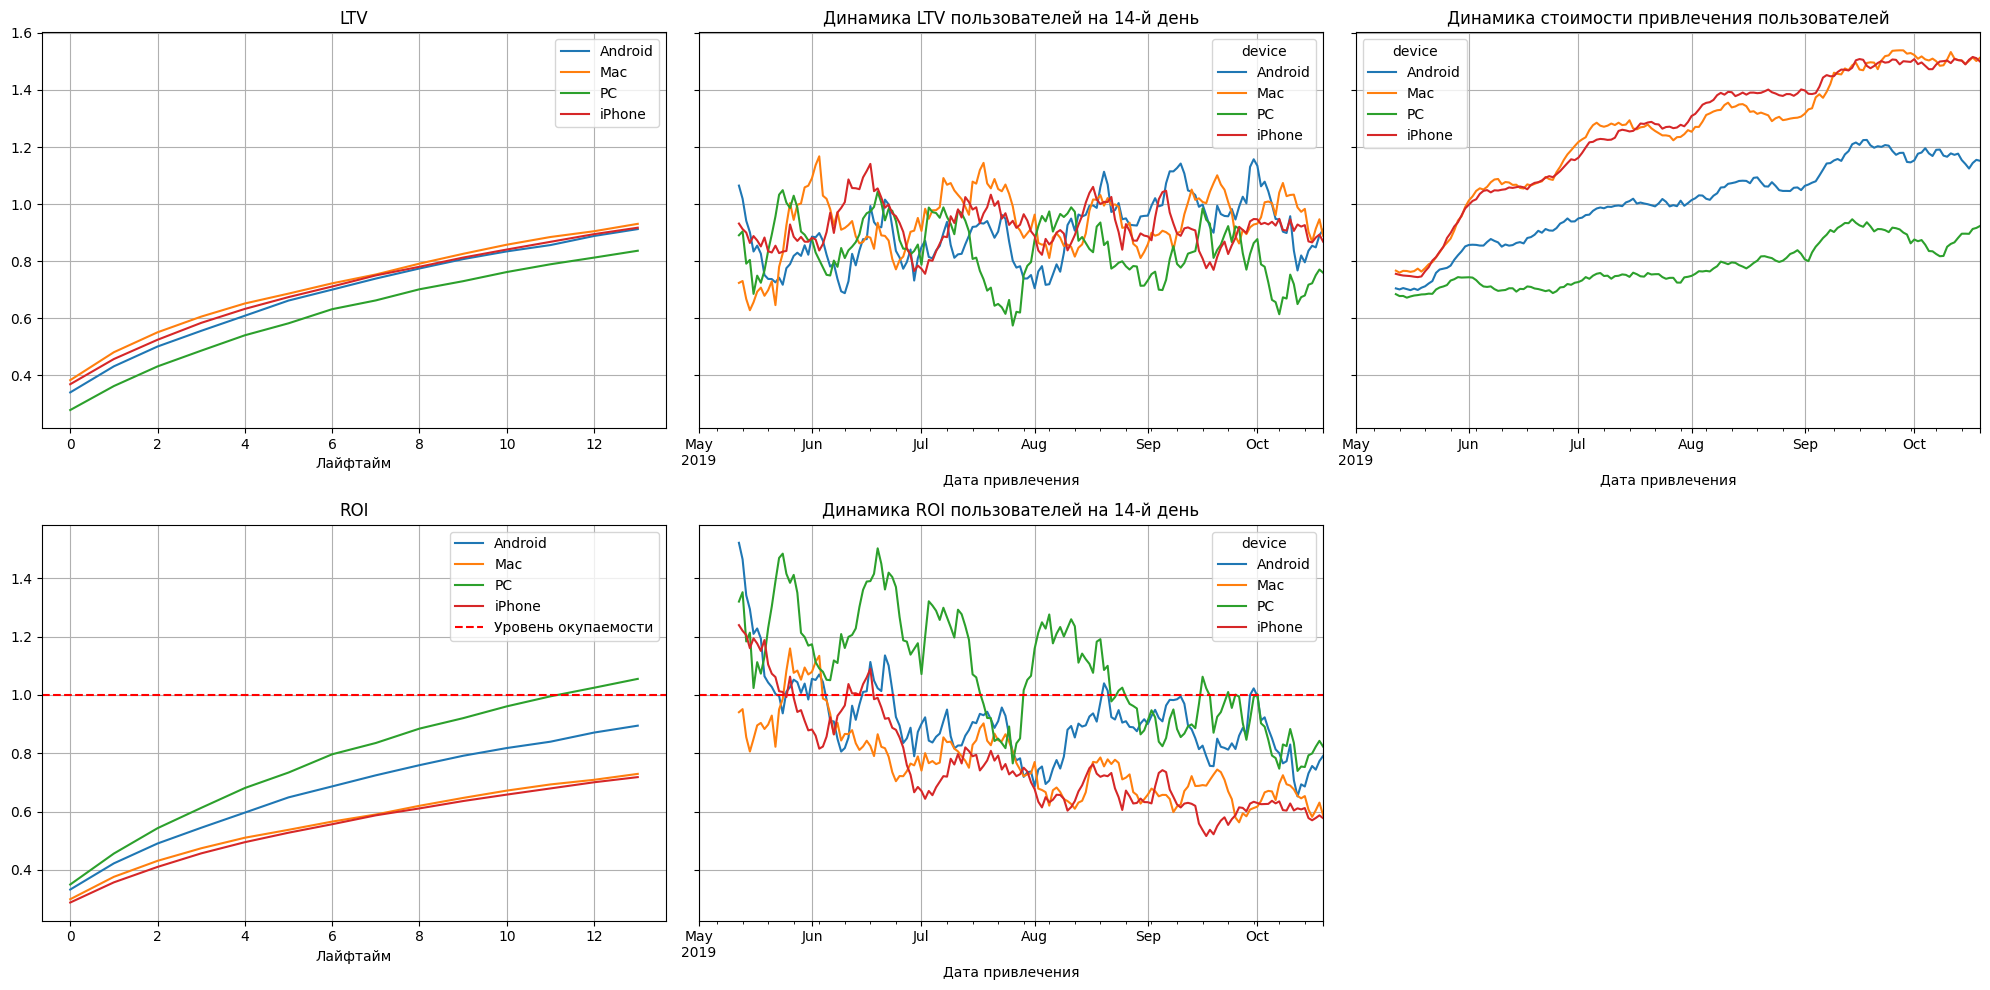

In [33]:
# Вызовем функцию для расчета LTV, CAC и ROI с разбивкой по устройствам, исключив органических пользователей
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles.query('channel != "organic"'), 
                                                         orders, observation_date, horizon_days, dimensions=['device'])

# Визуализируем полученные показатели на графиках
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=12)

<div style="border:solid Green 2px; padding: 20px">

Лучше всего себя показывает ПК - это единственное устройство, на котором маркетинг окупается. Также Андроид стремится в положительную зону. Однако динамика ROI по всем устройствам имеет нисходящий тренд - к концу временного периода анализа окупаемость на всех устройствах находится в отрицательной зоне. <br>
Хуже всего складывается ситуация на Mac и iPhone - несмотря на стабильные показатели LTV, пользователи с такими устройствами не окупаются ввиду дорогой и растущей в цене рекламмы.

#### Графики LTV, CAC и ROI с разбивкой по устройствам

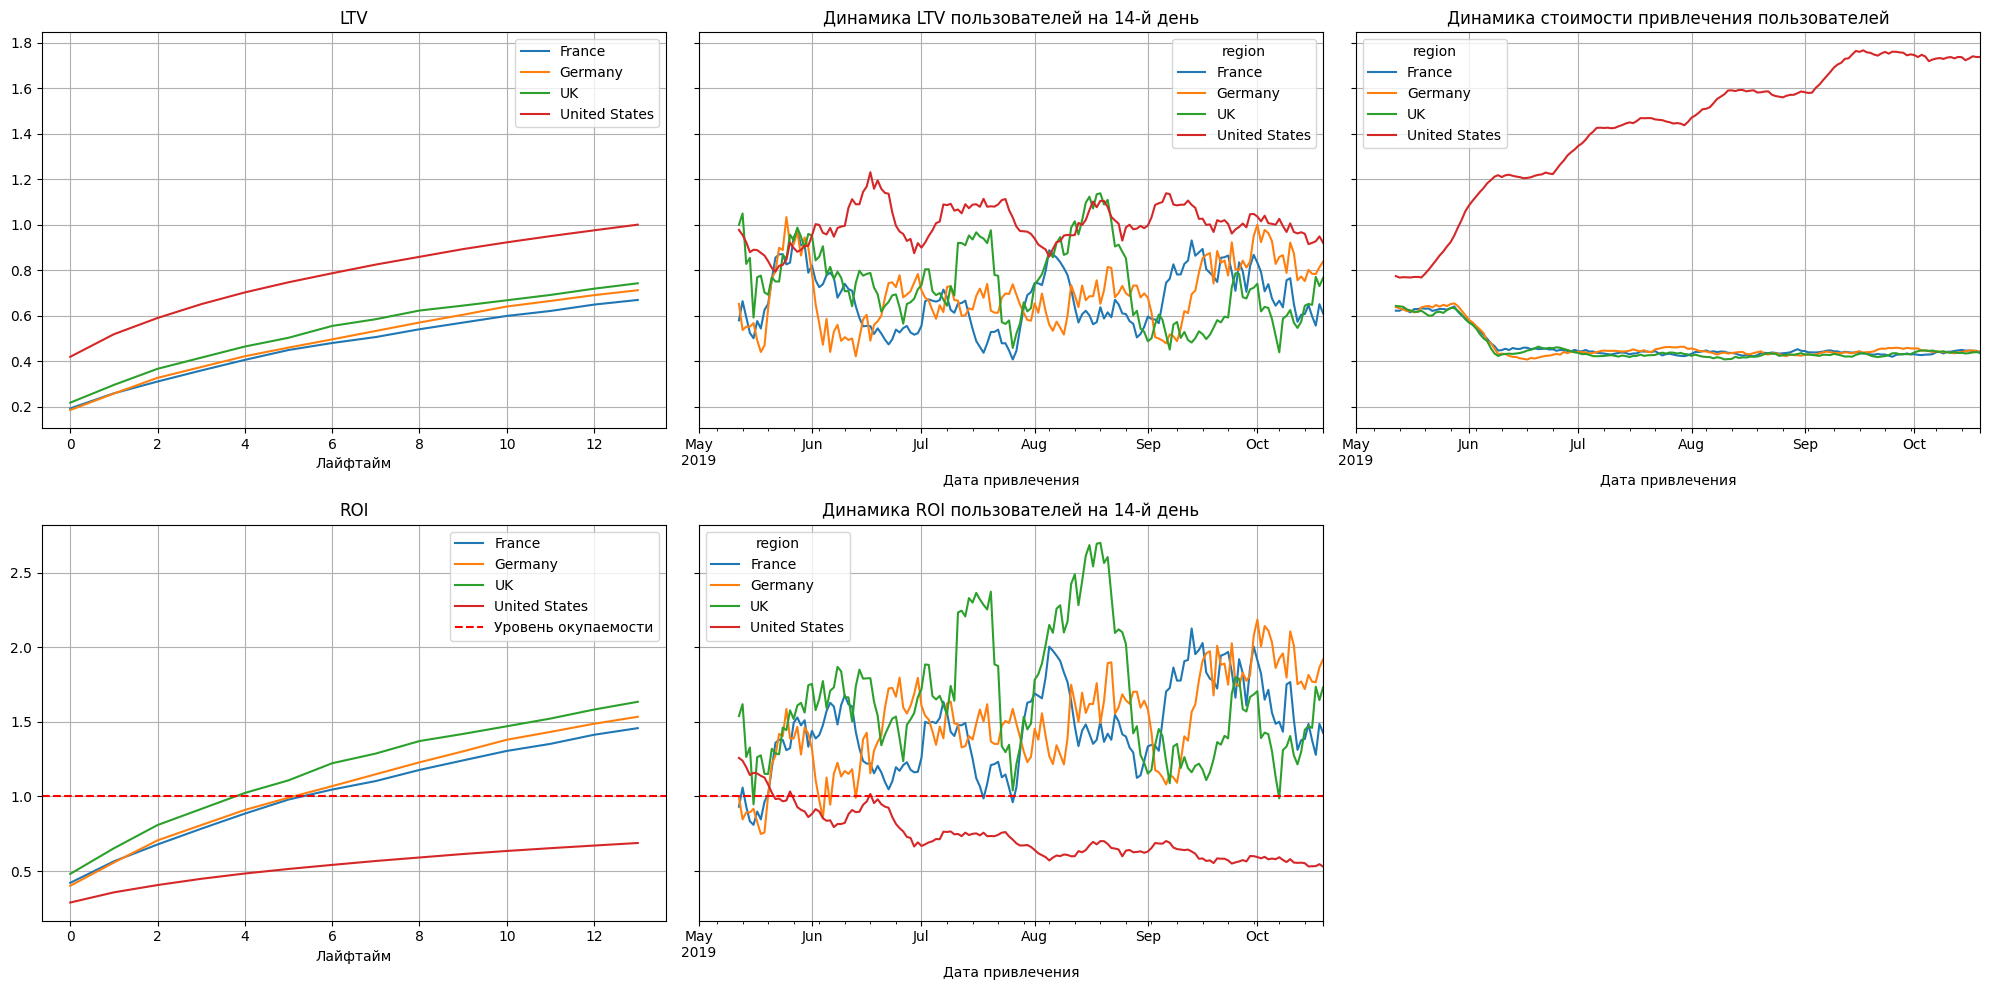

In [34]:
# Вызовем функцию для расчета LTV, CAC и ROI с разбивкой по странам, исключив органических пользователей
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles.query('channel != "organic"'), 
                                                         orders, observation_date, horizon_days, dimensions=['region'])

# Визуализируем полученные показатели на графиках
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=12)

<div style="border:solid Green 2px; padding: 20px">

А вот и явная аномалия - стоимость привлечения пользователей в США. Как мы ранее определили, здесь больше всего пользователей, порядка 100 тысяч. И привлечение таких пользователей стремительно растет в цене, что уводит показатель ROI в минус уже к середине мая. Другие страны наоборот имеют хорошие и уверенные показатели, которые ожидает бизнес. <br>
Однако стоит отметить, что пользователи из США имеют очень хороший показатель LTV, который существенно превосходит ценность пользователей из других стран, но в сочетании со стоимостью маркетинга, это не изменяет общей картины.

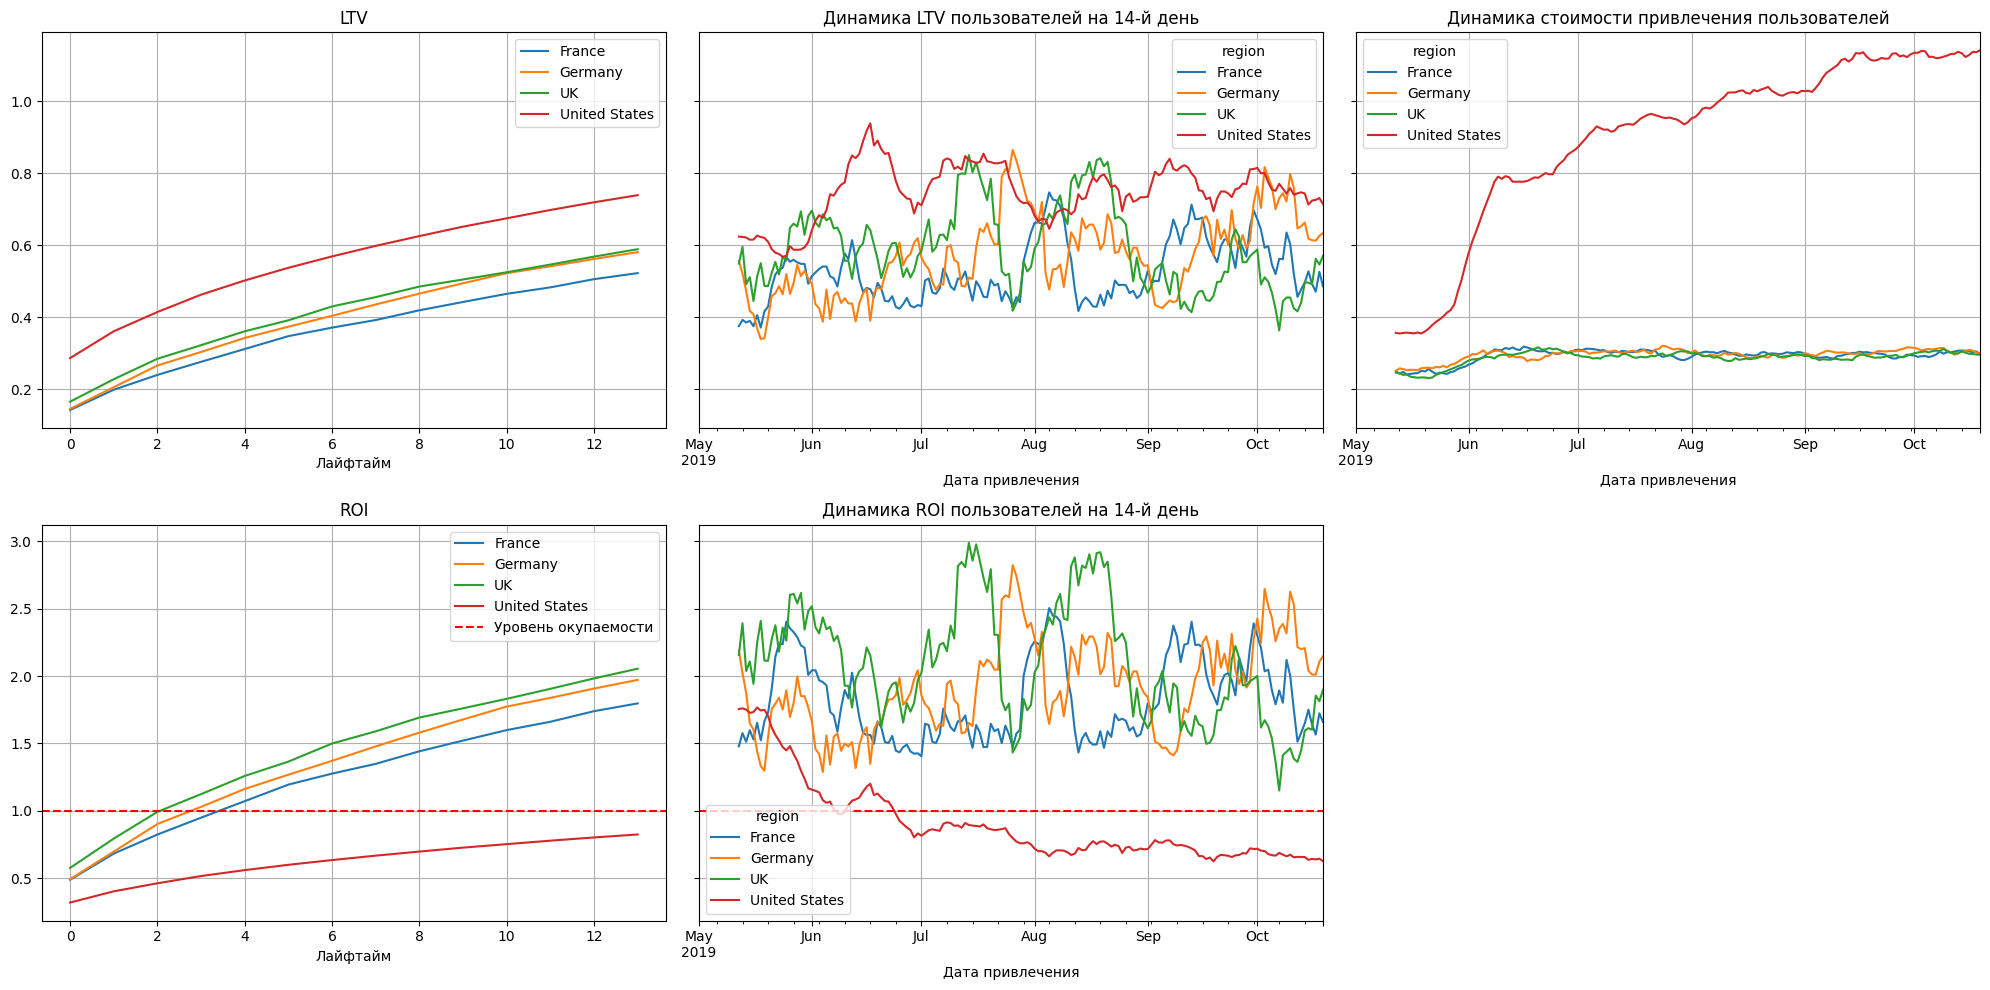

In [35]:
# Для полноты анализа проверим распределение с учетом всей совокупности пользователей
# Вызовем функцию для расчета LTV, CAC и ROI с разбивкой по странам
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, 
                                                         horizon_days, dimensions=['region'])

# Визуализируем полученные показатели на графиках
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=12)

<div style="border:solid Green 2px; padding: 20px">

Глобально ситуация не изменилась - выводы остаются прежними. Можно предположить, что органические пользователи оказывали основное влияние в начале временного периода: в мае и июне, благодоря их влиянию существенно изменились кривые стоимости привлечения пользователей из всех стран, также и окупаемость клиентов ушла в отрицательную зону в США позднее - во второй половине июня. Вероятнее всего в начале доля органических клиентов была выше, а затем стабилизировалась на сопоставимом рекламным пользователям уровне.

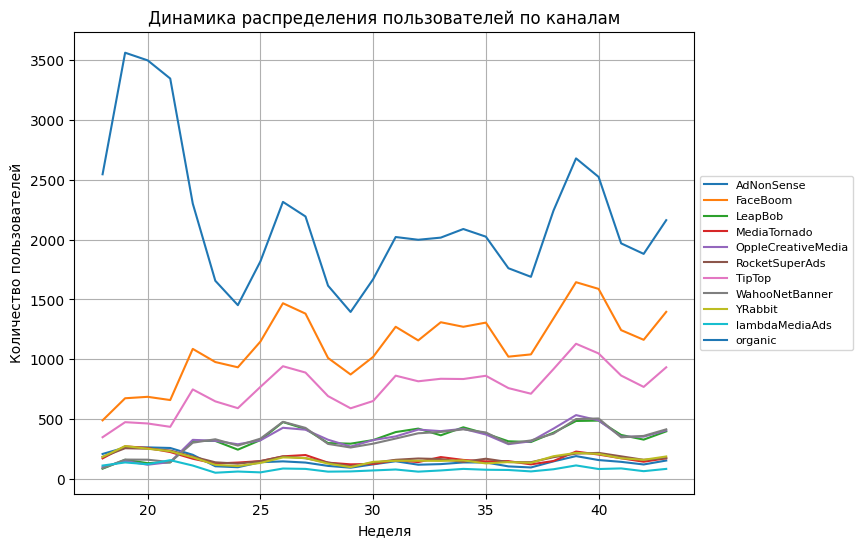

In [36]:
# Проверим гипотезу о распределении количества пользователей в динамике:
# построим график распределения пользователей по каналам
profiles.pivot_table(index = 'week',
                     columns = 'channel', 
                     values = 'user_id', 
                     aggfunc = 'nunique')\
        .plot(grid = True, figsize = (8, 6))
plt.title('Динамика распределения пользователей по каналам')
plt.xlabel('Неделя')
plt.ylabel('Количество пользователей')
plt.legend(bbox_to_anchor=(1, 0.7), fontsize=8)

plt.show()

<div style="border:solid Green 2px; padding: 20px">

Гипотеза подтвердилась: в начале был явный пик органических пользователей, доля которых в значительной степени превышала долю рекламных.

#### Графики LTV, CAC и ROI с разбивкой по рекламным каналам

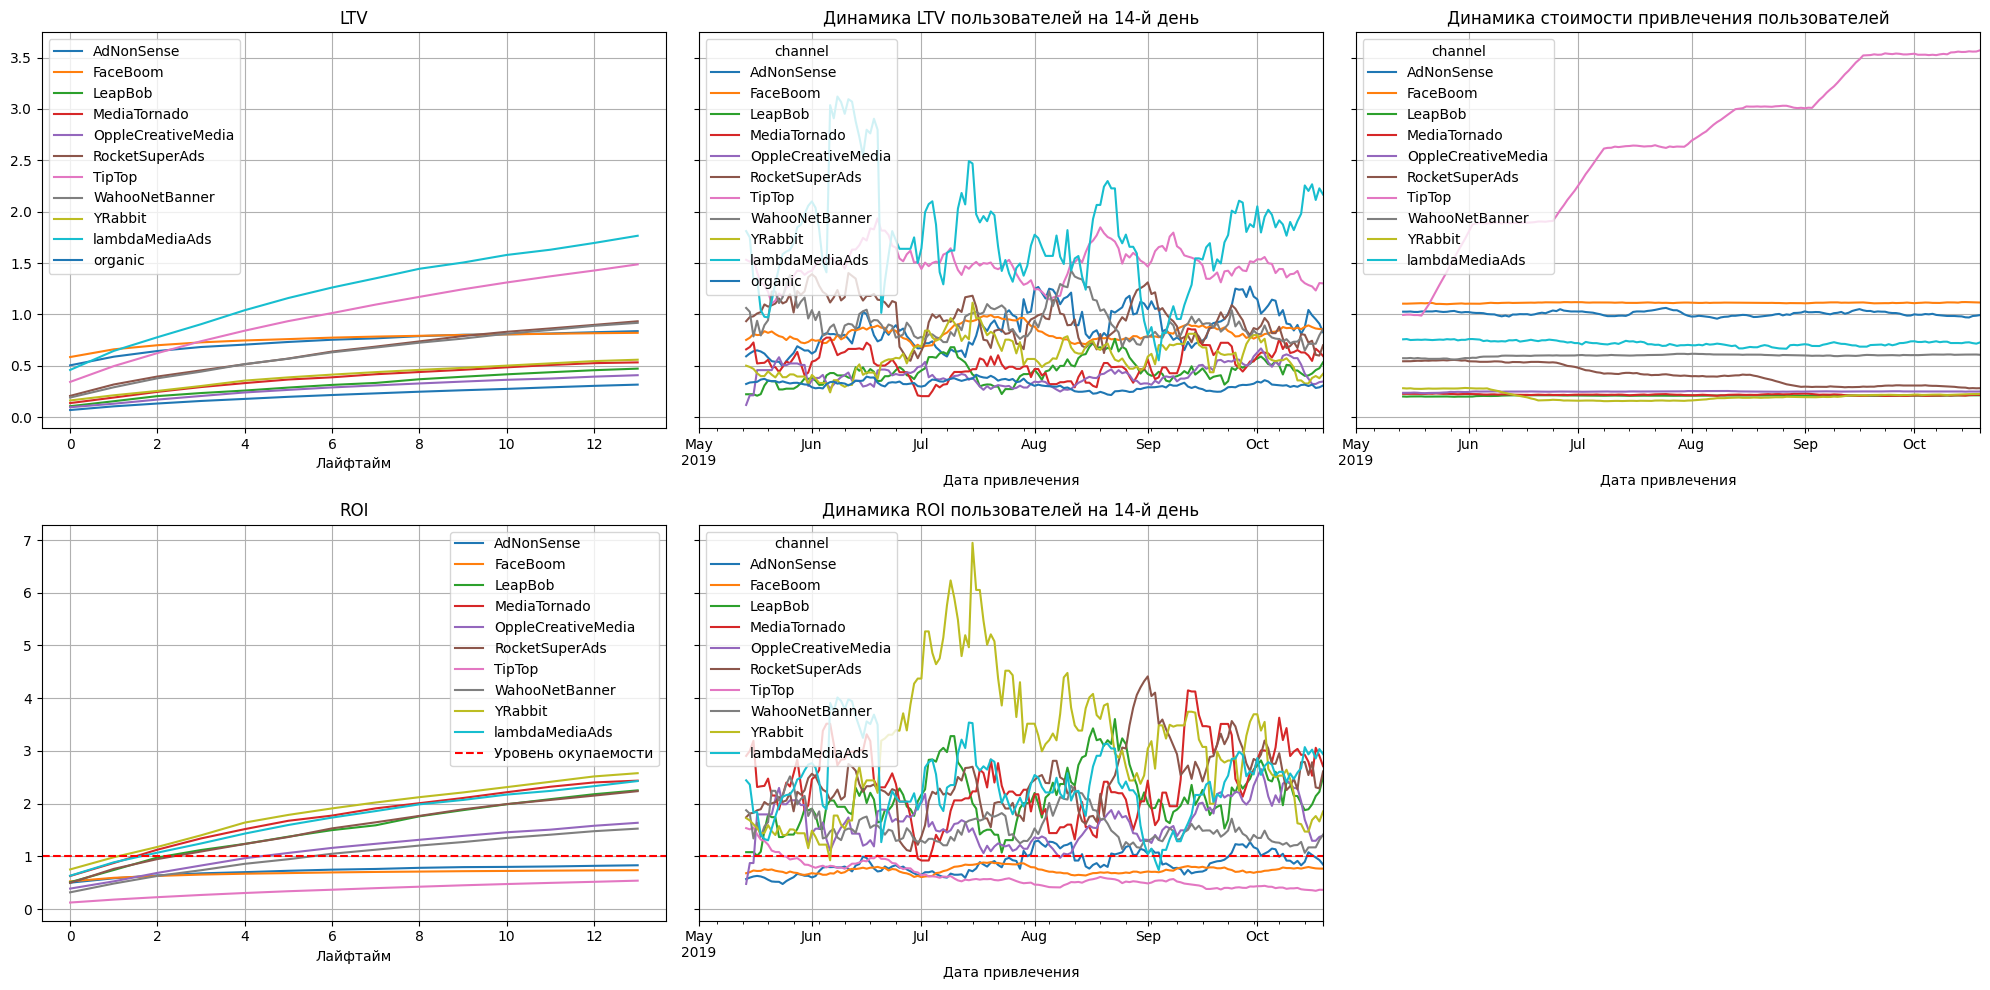

In [37]:
# Вызовем функцию для расчета LTV, CAC и ROI с разбивкой по каналам
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, 
                                                         horizon_days, dimensions=['channel'])

# Визуализируем полученные показатели на графиках
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

<div style="border:solid Green 2px; padding: 20px">

Ранее выдвинутое предположение о том, что кампания TipTop имеет аномальный рост также подтвердилась: стоимость привлечения клиентов растет с 1 до 3,5 $ за клиента. Несмотря на то, что клиенты из данного канала имеют один из самый лучших показателей LTV, такие пользователи не окупаются. <br>
В соответствии с условиями от бизнеса не окупаются 3 канала привлечения: TipTop, FaceBoom и AdNonSense. Остальные каналы имеют хорошую рентабльность. Также лучшим показателем ROI обладают клиенты, привлеченные каналами YRabbit, lambdaMediaAds и MediaTornado - стоимость услуг данных компании очень низкая, однако количество коиентов из данного канала оставляет желать лучшего. 

#### Итоговая оценка

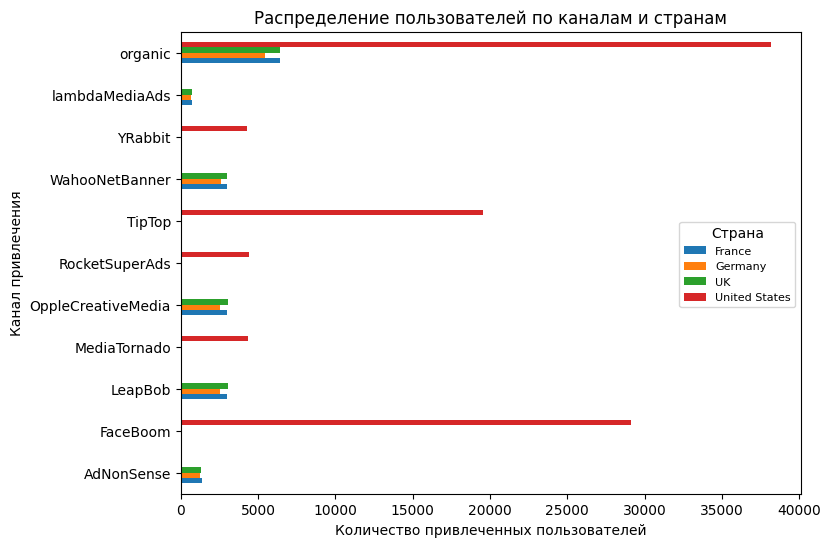

In [38]:
# Рассмотрим распределение клиентов с разбивкой по каналам и странам
profiles.pivot_table(index = 'channel', columns = 'region', values = 'user_id', aggfunc = 'count').fillna(0)\
        .plot(kind = 'barh', figsize = (8, 6))
plt.title('Распределение пользователей по каналам и странам')
plt.xlabel('Количество привлеченных пользователей')
plt.ylabel('Канал привлечения')
plt.legend(bbox_to_anchor=(1, 0.6), fontsize=8, title = "Страна")

plt.show()

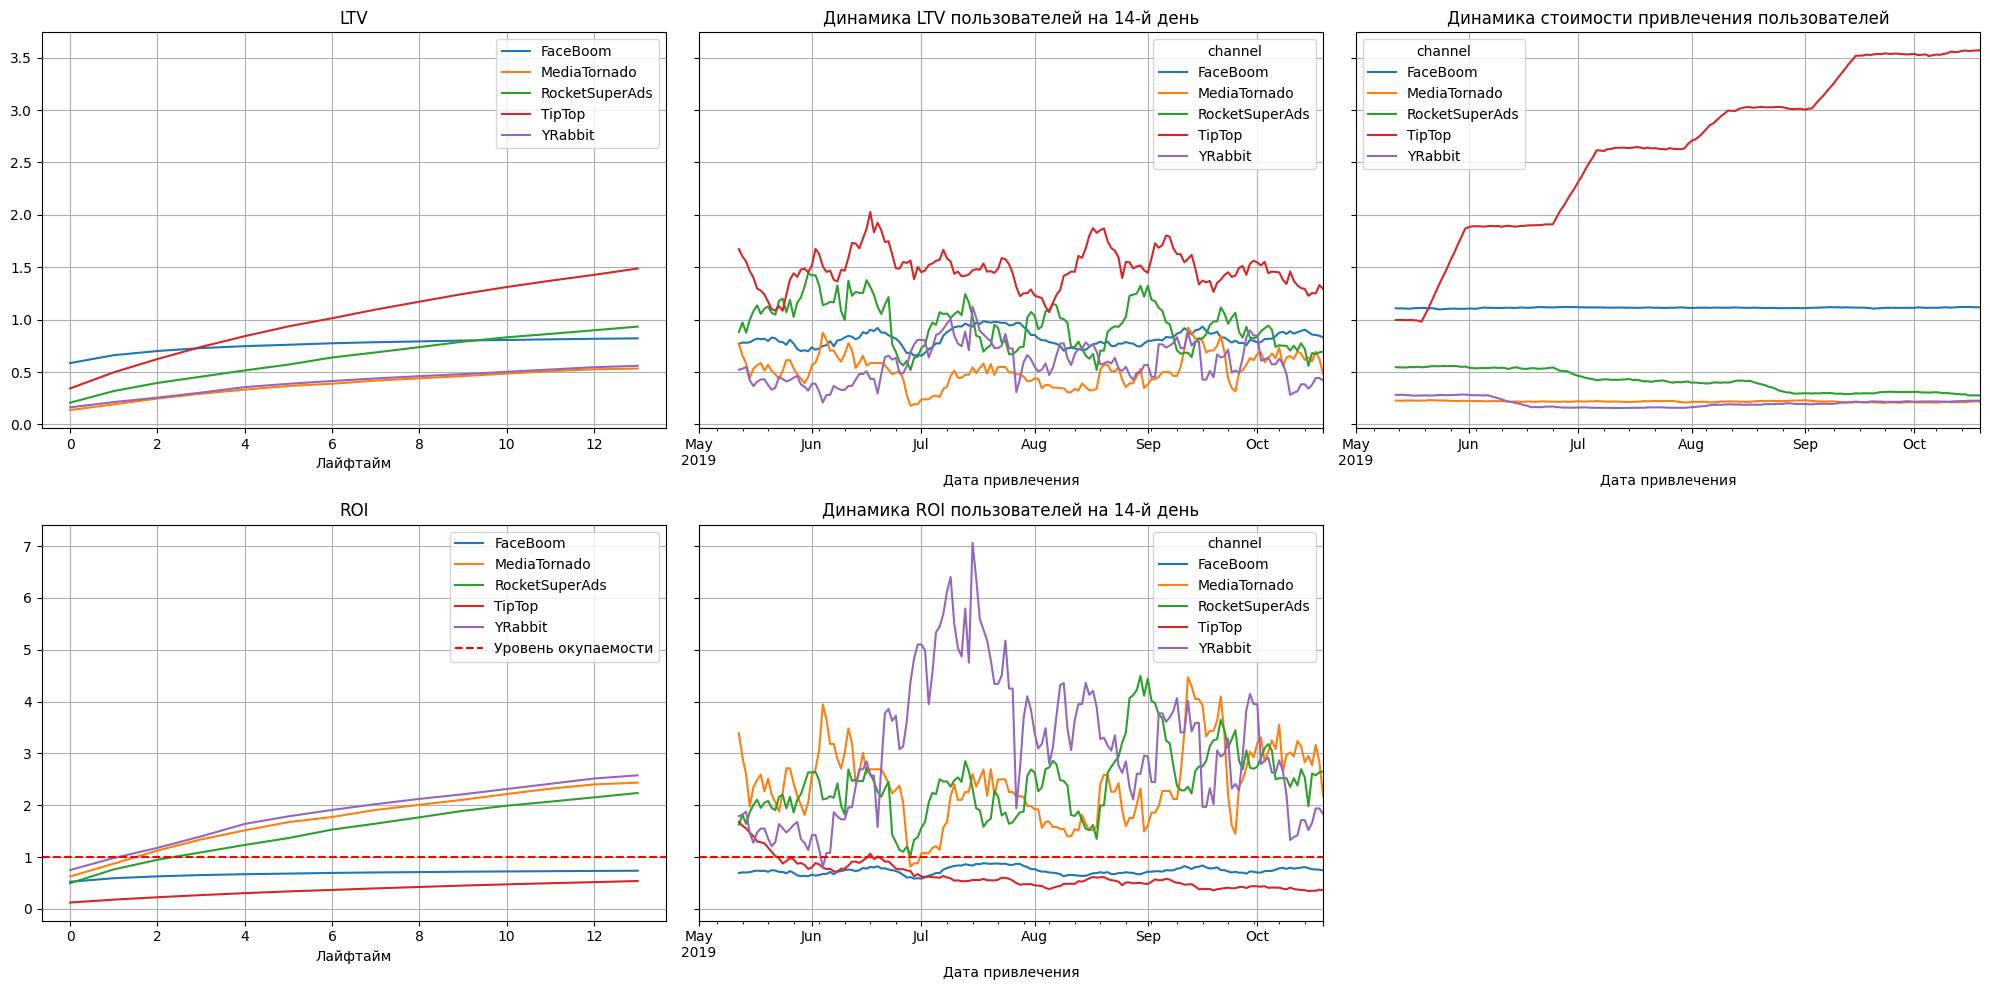

In [39]:
# Рассмотрим показатели LTV, CAC и ROI с разбивкой по каналам только в США
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles.query('channel != "organic" and region == "United States"'), 
                                                         orders, observation_date, horizon_days, dimensions=['channel'])

# Визуализируем полученные показатели на графиках
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=12)

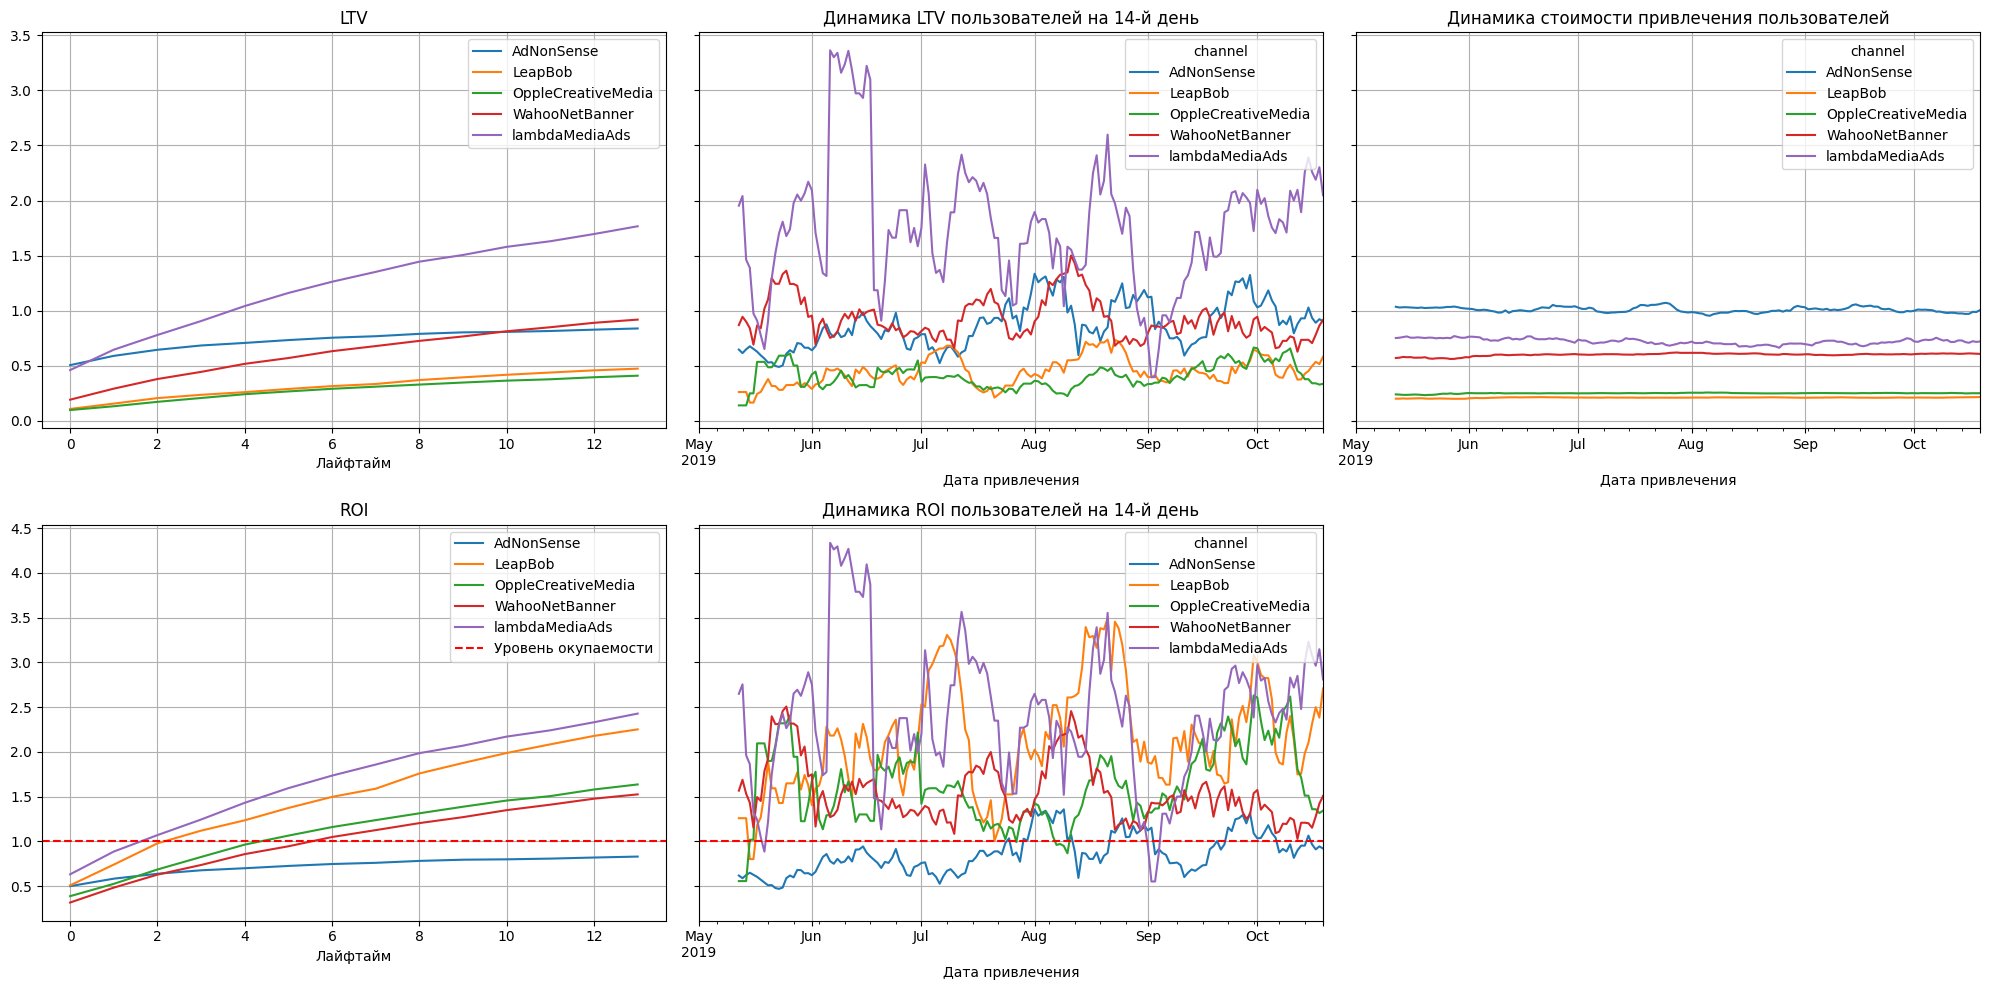

In [40]:
# Рассмотрим показатели LTV, CAC и ROI с разбивкой по каналам в Европе
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles.query('channel != "organic" and region != "United States"'), 
                                                         orders, observation_date, horizon_days, dimensions=['channel'])

# Визуализируем полученные показатели на графиках
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=12)

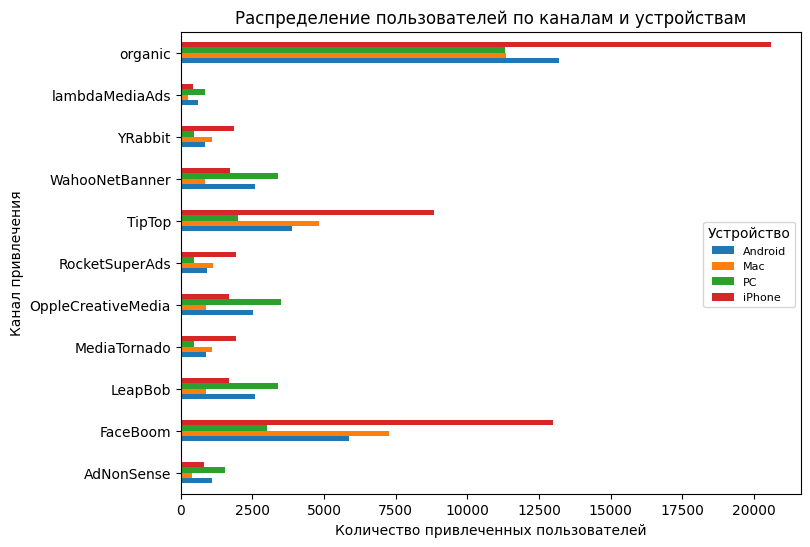

In [41]:
# Рассмотрим распределение клиентов с разбивкой по каналам и устройствам
profiles.pivot_table(index = 'channel', columns = 'device', values = 'user_id', aggfunc = 'count').fillna(0)\
        .plot(kind = 'barh', figsize = (8, 6))
plt.title('Распределение пользователей по каналам и устройствам')
plt.xlabel('Количество привлеченных пользователей')
plt.ylabel('Канал привлечения')
plt.legend(bbox_to_anchor=(1, 0.6), fontsize=8, title = "Устройство")

plt.show()

<div style="border:solid Green 2px; padding: 20px">

По графикам распределения пользователей в зависимости от канала привлечения, страны и устройства, видна взаимосвязь между двумя наиболее дорогими рекламными кампаниями - TipTop, FaceBoom. Данные кампании привлекают клиентов исключительно из США, что оказывает отрицательное влияние на окупаемость рекламы из этой страны. Ни в динамике, ни в течение 14 дней реклама из этих каналов не окупается. Также эти кампании в бОльшей части привлекают клиентов на устройствах Apple, что вновь оказывает негативное влияние на окупаемость. <br>
По третьему убыточному каналу такой зависимости нет - его реклама равномерно диверсифицирована по всем устройствам и странам.
    
В связи с этим корневой причиной убытков компании можно считать каналы привлечения TipTop и FaceBoom - необходима плотная работа отдела маркетинга с данными кампаниями для определения возможностей снижения стоимости рекламы или повышения ее эффективности.

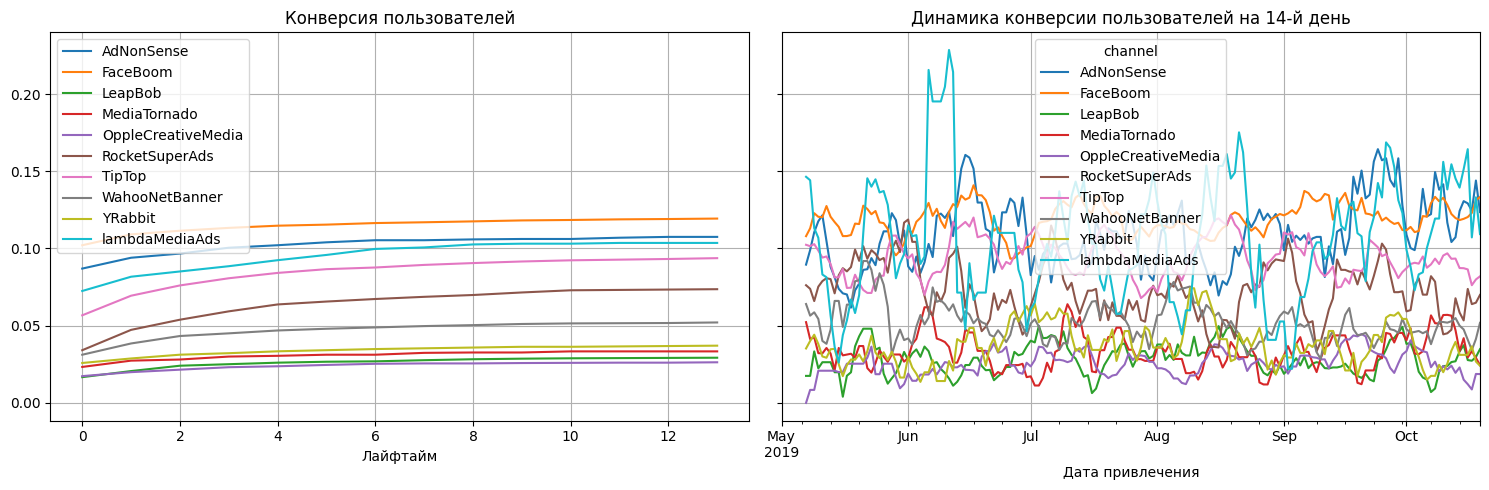

In [42]:
# Рассмотрим конверсию пользователей с распределением по каналам
conversion_raw, conversion, conversion_in_time = get_conversion(profiles.query('channel != "organic"'), 
                                                                orders, observation_date, horizon_days, dimensions=['channel'])

# Визуализируем конверсию и динамику конверсии на конец 2 недели
plot_conversion(conversion, conversion_in_time, horizon_days, window=7)

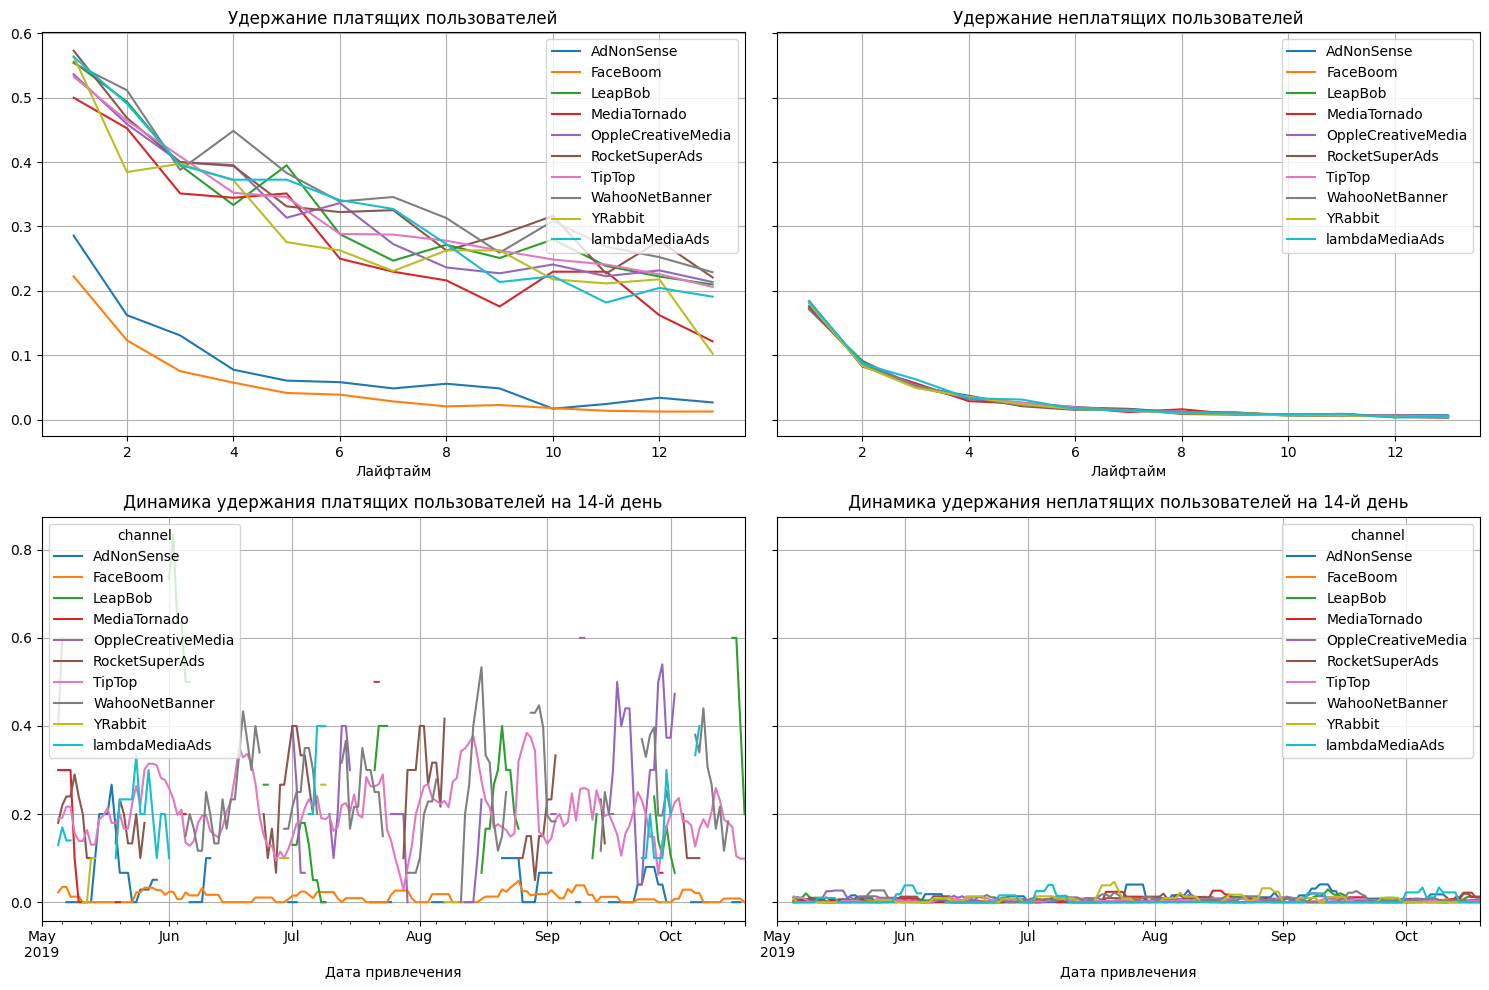

In [43]:
# Рассмотрим удержание пользователей с распределением по каналам
retention_raw, retention, retention_in_time = get_retention(profiles.query('channel != "organic"'),
                                                            visits, observation_date, horizon_days, dimensions=['channel'])

# Визуализируем удержание и динамику удержания на конец 2 недели
plot_retention(retention, retention_in_time, horizon_days, window=5)

<div style="border:solid Green 2px; padding: 20px">

У ранее выявленных проблемных каналов хорошая конверсия, причем FaceBoom показывает лидирующий показатель на 14 день - 12%. Компания TipTop имеет самый низкий показатель в данной группе, но в целом очень хороший. Также стоит отметить, что у 4 каналов конверсия не превышает 5%, что является довольно не высоким показателем.<br>
А вот по удержанию компания TipTop показывает себя уверенно, на равне с другими, эффективными каналами - порядка 20% платящих пользователей остаются в прилоложении спустя 2 недели, в то время как показатель каналов FaceBoom и AdNonSense приближается к нулевой отметке и явно выделяется в худшую сторону среди конкурентов.

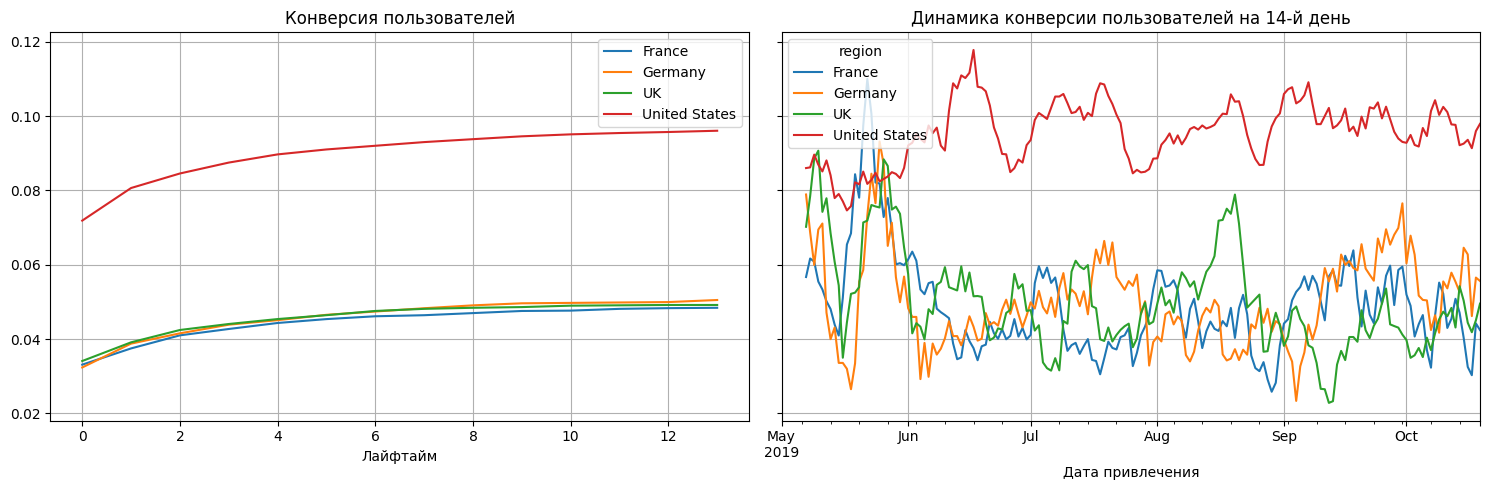

In [44]:
# Рассмотрим конверсию пользователей с распределением по странам
conversion_raw, conversion, conversion_in_time = get_conversion(profiles.query('channel != "organic"'), 
                                                                orders, observation_date, horizon_days, dimensions=['region'])

# Визуализируем конверсию и динамику конверсии на конец 2 недели
plot_conversion(conversion, conversion_in_time, horizon_days, window=7)

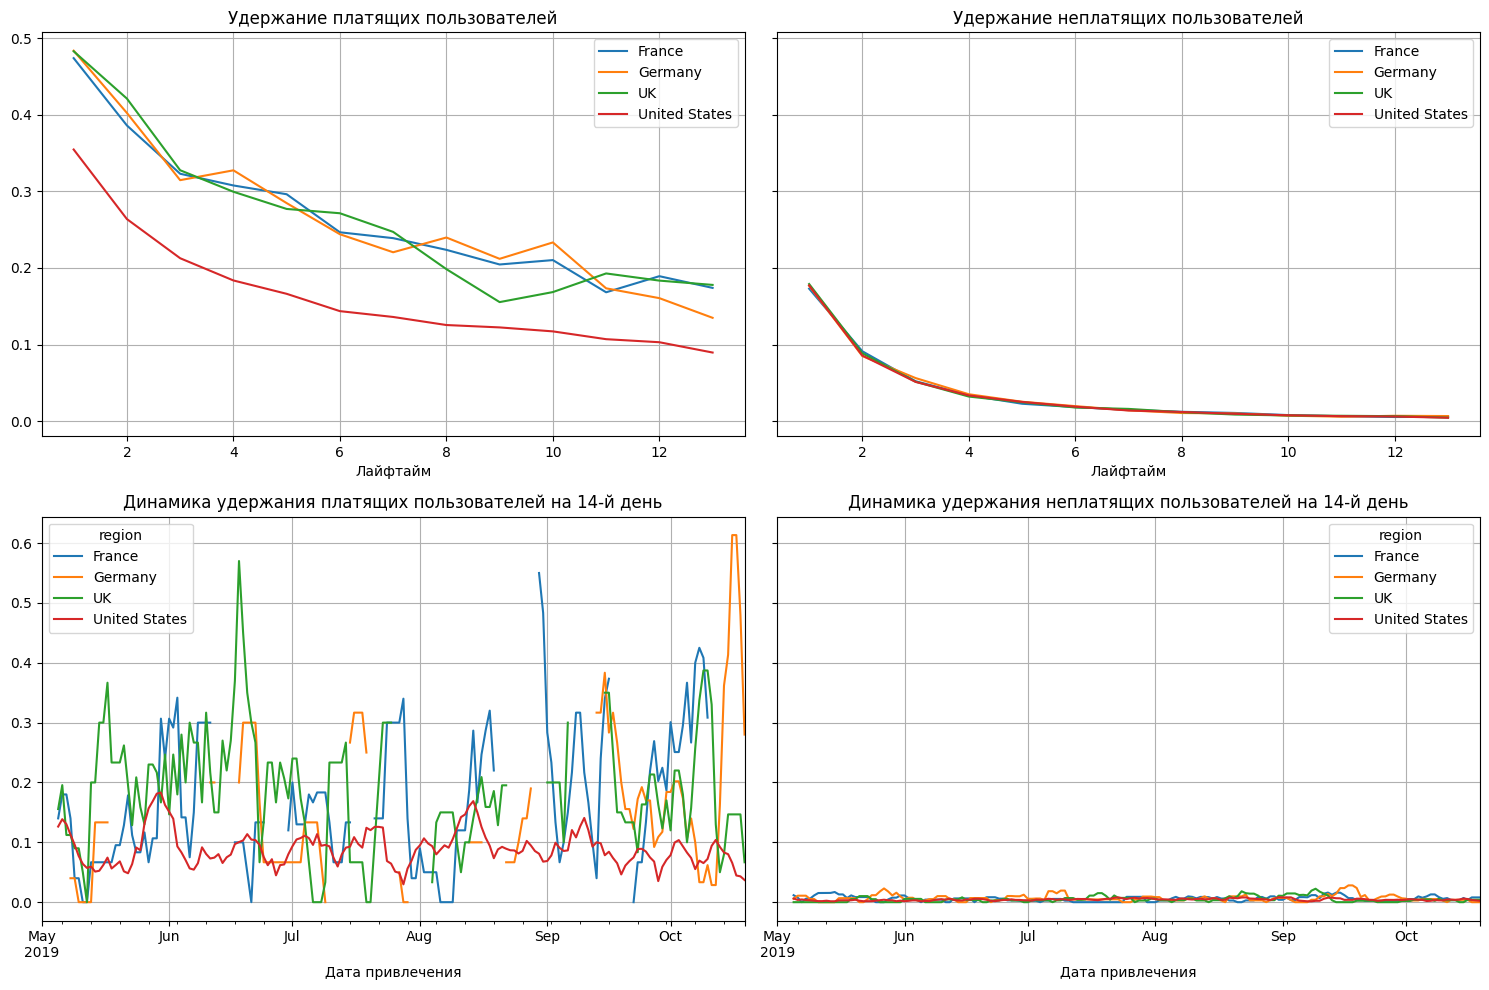

In [45]:
# Рассмотрим удержание пользователей с распределением по странам
retention_raw, retention, retention_in_time = get_retention(profiles.query('channel != "organic"'),
                                                            visits, observation_date, horizon_days, dimensions=['region'])

# Визуализируем удержание и динамику удержания на конец 2 недели
plot_retention(retention, retention_in_time, horizon_days, window=5)

<div style="border:solid Green 2px; padding: 20px">

Конверсия и удержание пользователей из США сильно отличается от других стран. Однако причина остается прежней: влияние двух самых крупных каналов TipTop и FaceBoom. <br>
Данные каналы обеспечивают основную массу платных клиентов из США и обладают высоким уровнем конверсии, что в свою очередь сильно влияет на уровень данного показателя в разрезе всех стран. Так, если рассмотреть 3 оставшиеся страны, то видно, что их уровень ниже среднего показателя - порядка 5% к концу второй недели. Данный уровень стабильный в динамике на протяжении всего временного периода.<br>
То же самое отмечается и на графике удержания пользователей - США заметно ниже других стран, а причиной тому является канал FaceBoom. Другие страны показывают уровень в районе 15% после 14 дней, что также нельзя назвать высоким показателем.

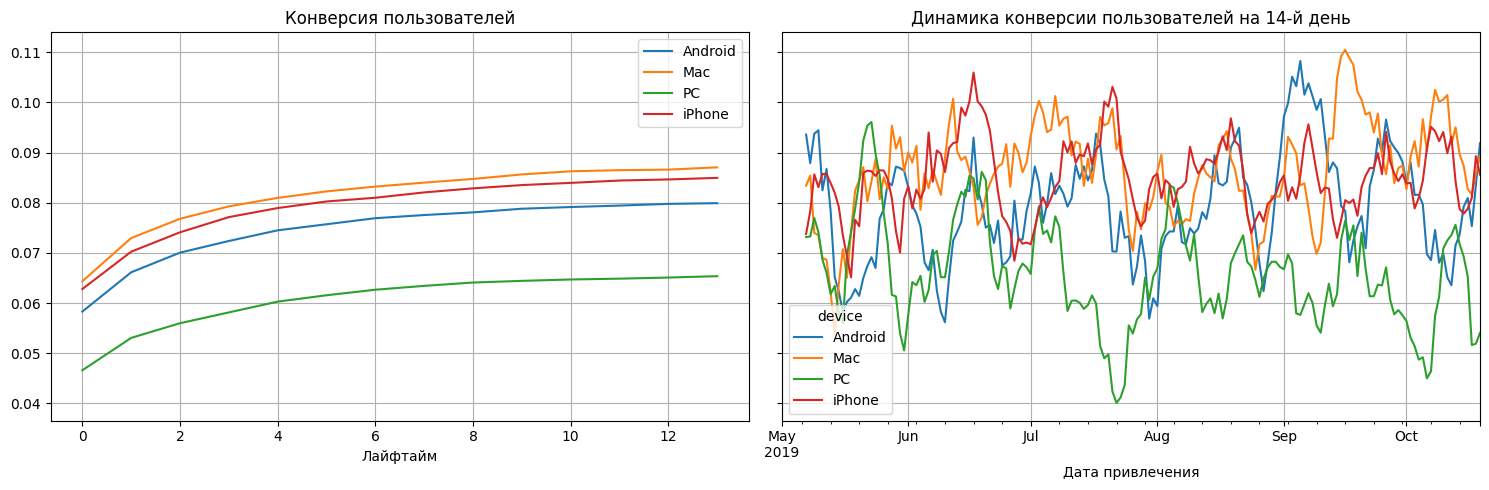

In [46]:
# Рассмотрим конверсию пользователей с распределением по устройствам
conversion_raw, conversion, conversion_in_time = get_conversion(profiles.query('channel != "organic"'), 
                                                                orders, observation_date, horizon_days, dimensions=['device'])

# Визуализируем конверсию и динамику конверсии на конец 2 недели
plot_conversion(conversion, conversion_in_time, horizon_days, window=7)

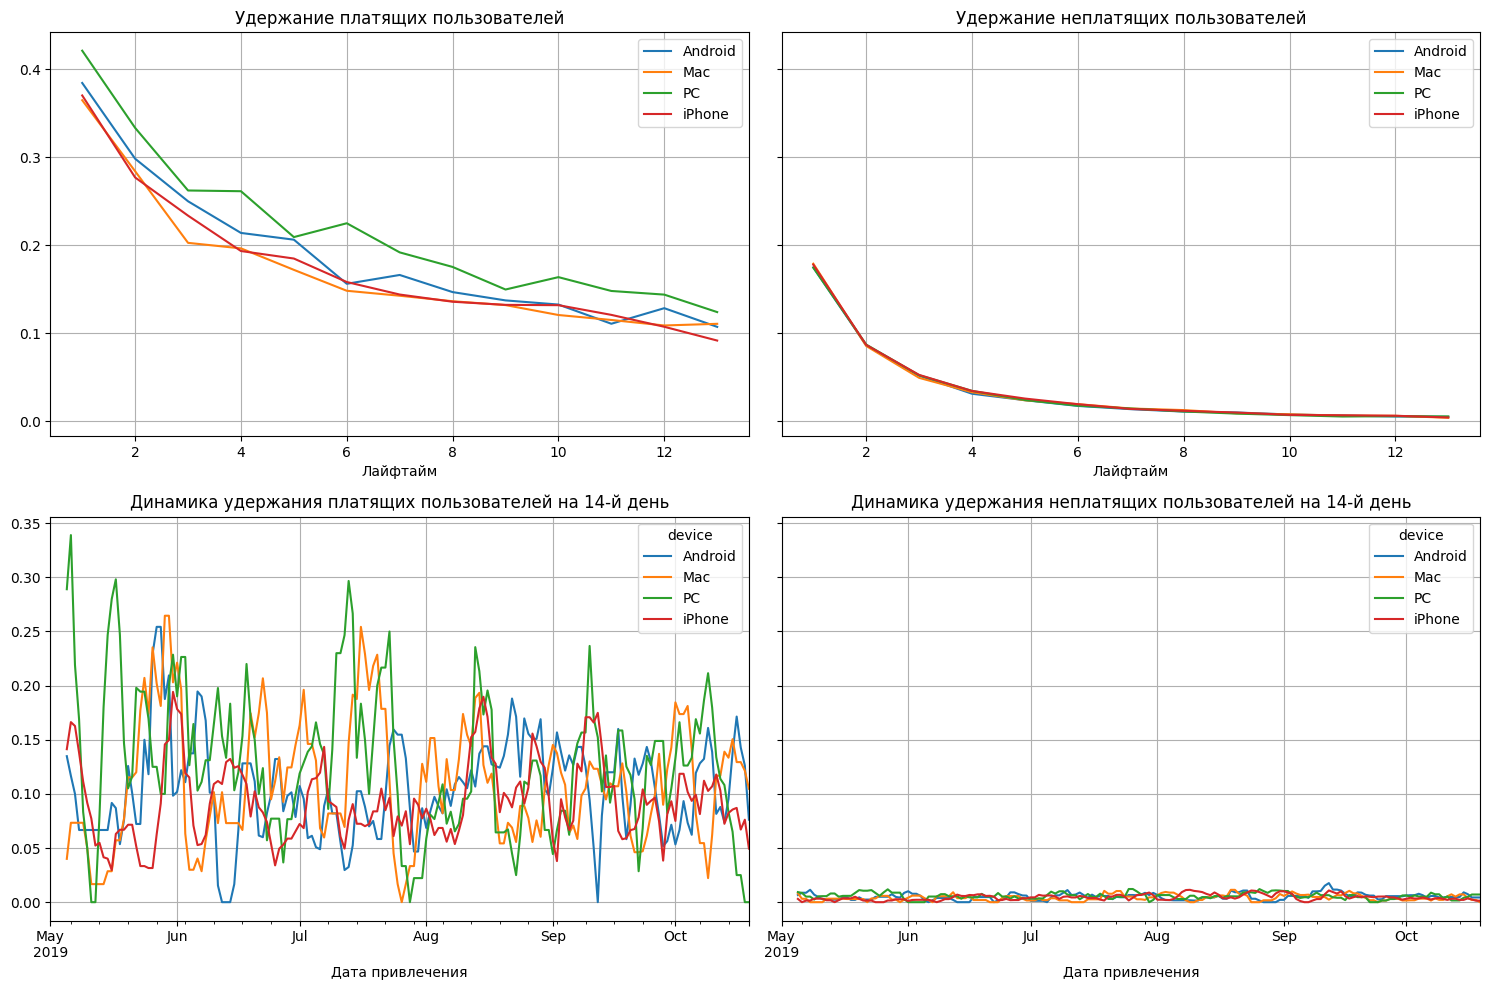

In [47]:
# Рассмотрим удержание пользователей с распределением по устройствам
retention_raw, retention, retention_in_time = get_retention(profiles.query('channel != "organic"'),
                                                            visits, observation_date, horizon_days, dimensions=['device'])

# Визуализируем удержание и динамику удержания на конец 2 недели
plot_retention(retention, retention_in_time, horizon_days, window=5)

<div style="border:solid Green 2px; padding: 20px">

Ранее мы определили, что ПК являлся одним устройством, которое окупалось. Однако компютер имеет самый низкий уровень конверсии среди устройств - локальные минимумы ПК доходят почти до нулевых значений в отдельные периоды.Устройства Apple же имеют самый высокий уровень. В данном случае вновь необходимо учитывать влияние каналов TipTop и FaceBoom, ведь они имеют наибольший процент пользователей с данными устройствами. <br>
Касаемо удержания все устройства показывают примерно одинаковые уровни - несколько выше выделяется ПК, но не глобально. В целом процент удержания к концу второй недели составляет около 10%, что мы и видели ранее на общем графике. Довольно низкий уровень.

<div style="border:solid Green 2px; padding: 20px">

**Вывод:**<br>
    
Таким образом удалось определить основные точки роста для проекта:
    
**- TipTop:** Постоянно растущая стоимость услуг, которая, несмотря на хорошие показатели конверсии и удержания, не окупается продажами
    
**- FaceBoom:** Очень низкий процент удержания клиентов и высокая стоимость услуг - хоть компания и характеризуется превосходной конверсией, изначально дорогая стоимость рекламы и малое количество оставшихся клиентов не окупают вложения
    
**- AdNonSense:** Низкий процент удержания клиентов и высокая стоимость услуг. Можно сказать, что это компания "среднячок" -  она имеет все средние показатели и ничем не выделяется. Снизив стоимость услуг, или повысив удержание, данная компания может стать потенциально рентабельной для бизнеса.
    
**- Конверсия по странам:** Показатель конверсии в Германии, Великобритании и Франции колеблется на примерно одинаковом уровне и составляет порядка 5% к концу второй недели - необходимо определить возможности для повышения данного уровня.

**- Конверсия ПК:** Конверсия на компютере значительно ниже других устройств - необходимо проверить логи ошибок и детально разобраться с приложением на ПК, чтобы определить причины пониженного уровня конверсии.

**- Удержание пользователей:** Слабым местом приложения является удержание пользователей. Независимо из какой страны, или какого устройства пришел пользователь - данный показатель находится на среднем уровне.

### Моделирование бизнеса

<div style="border:solid Green 2px; padding: 20px">

Реализуем модель показетелей LTV, ROI и CAC, убрав из анализа "проблемные" каналы. Моделирование будем проводить без учета органических пользователей, чтобы учитывать чистую окупаемость вложенных средств.

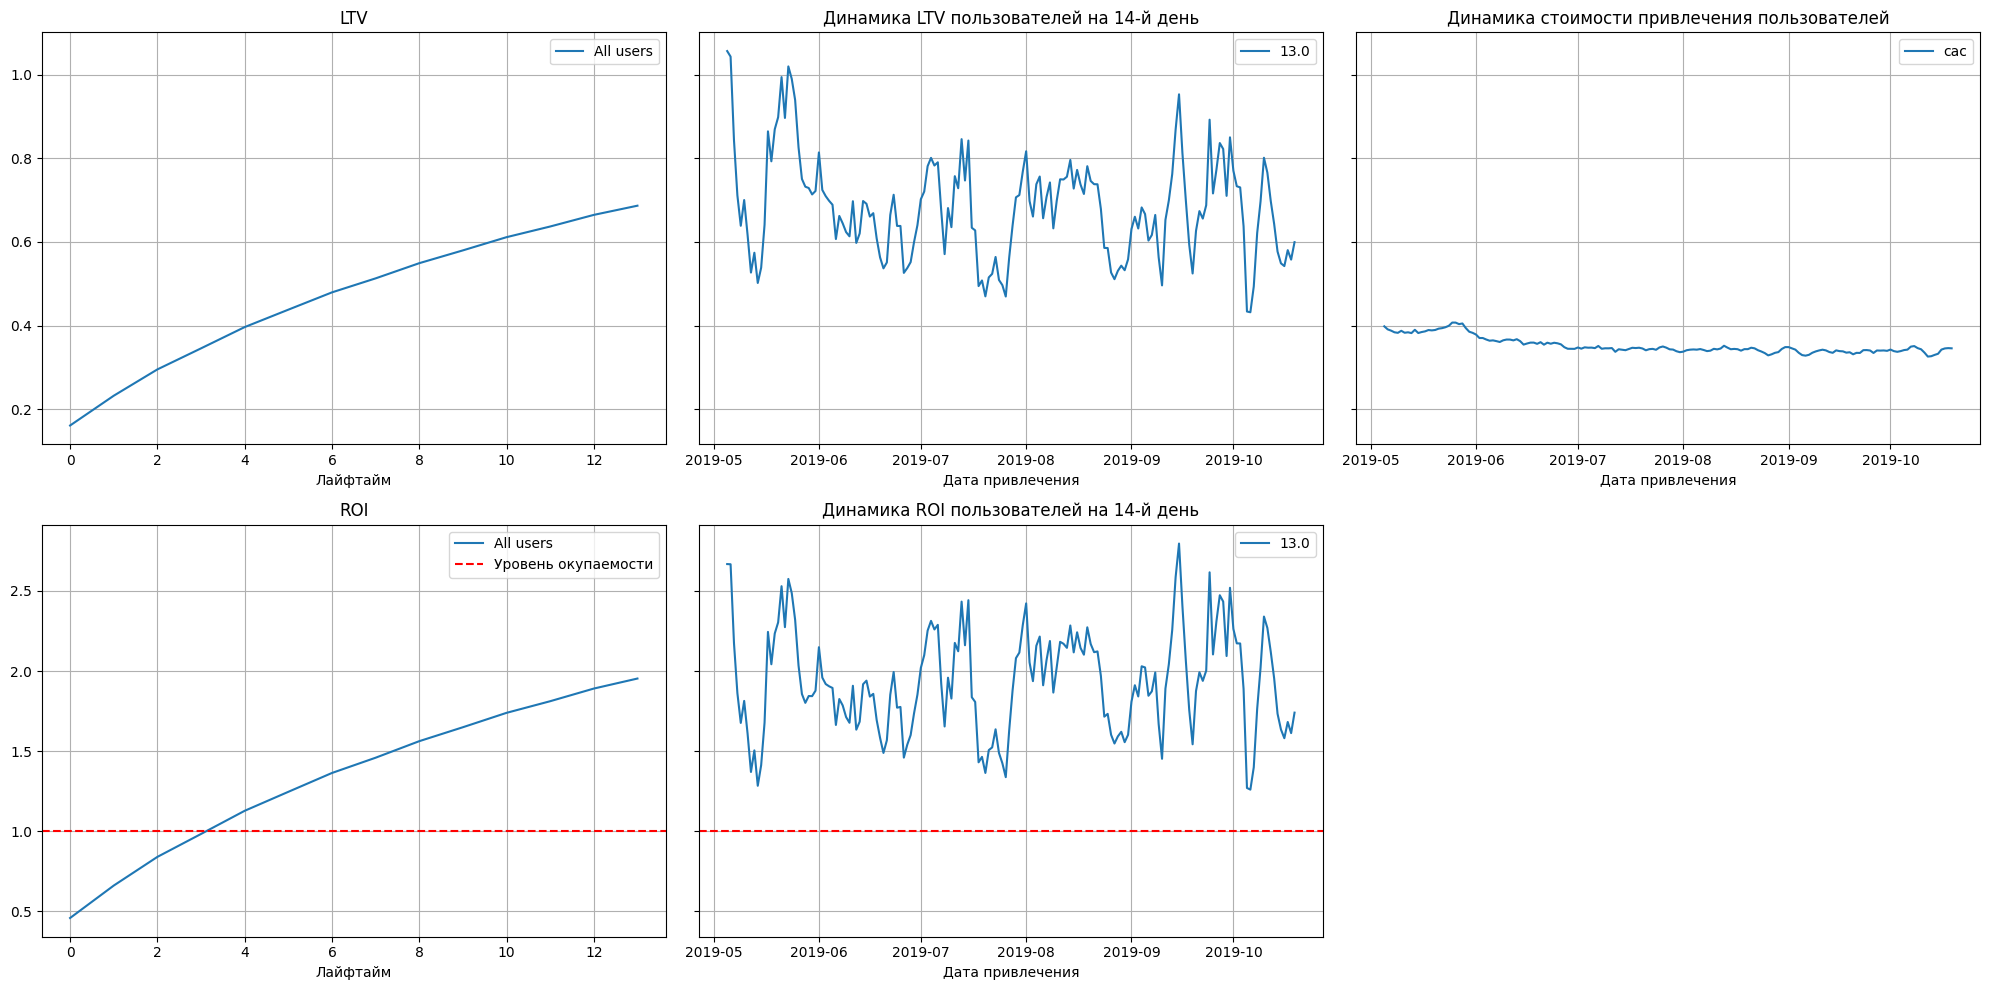

In [48]:
# Исключаем каналы
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles.query(
                                                 'channel not in ["TipTop", "FaceBoom", "AdNonSense", "organic"]'
                                                 ), 
                                                         orders, observation_date, horizon_days)

# Визуализируем полученные показатели на графиках
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=5)

<div style="border:solid Green 2px; padding: 20px">

Получили отличные показатели бизнеса - реклама окупается на 4 день и стабильна в динамике, стоимость привлечения клиентов постепенно уменьшается, а LTV стабильно колеблется в районе 0.7$ за пользователя.

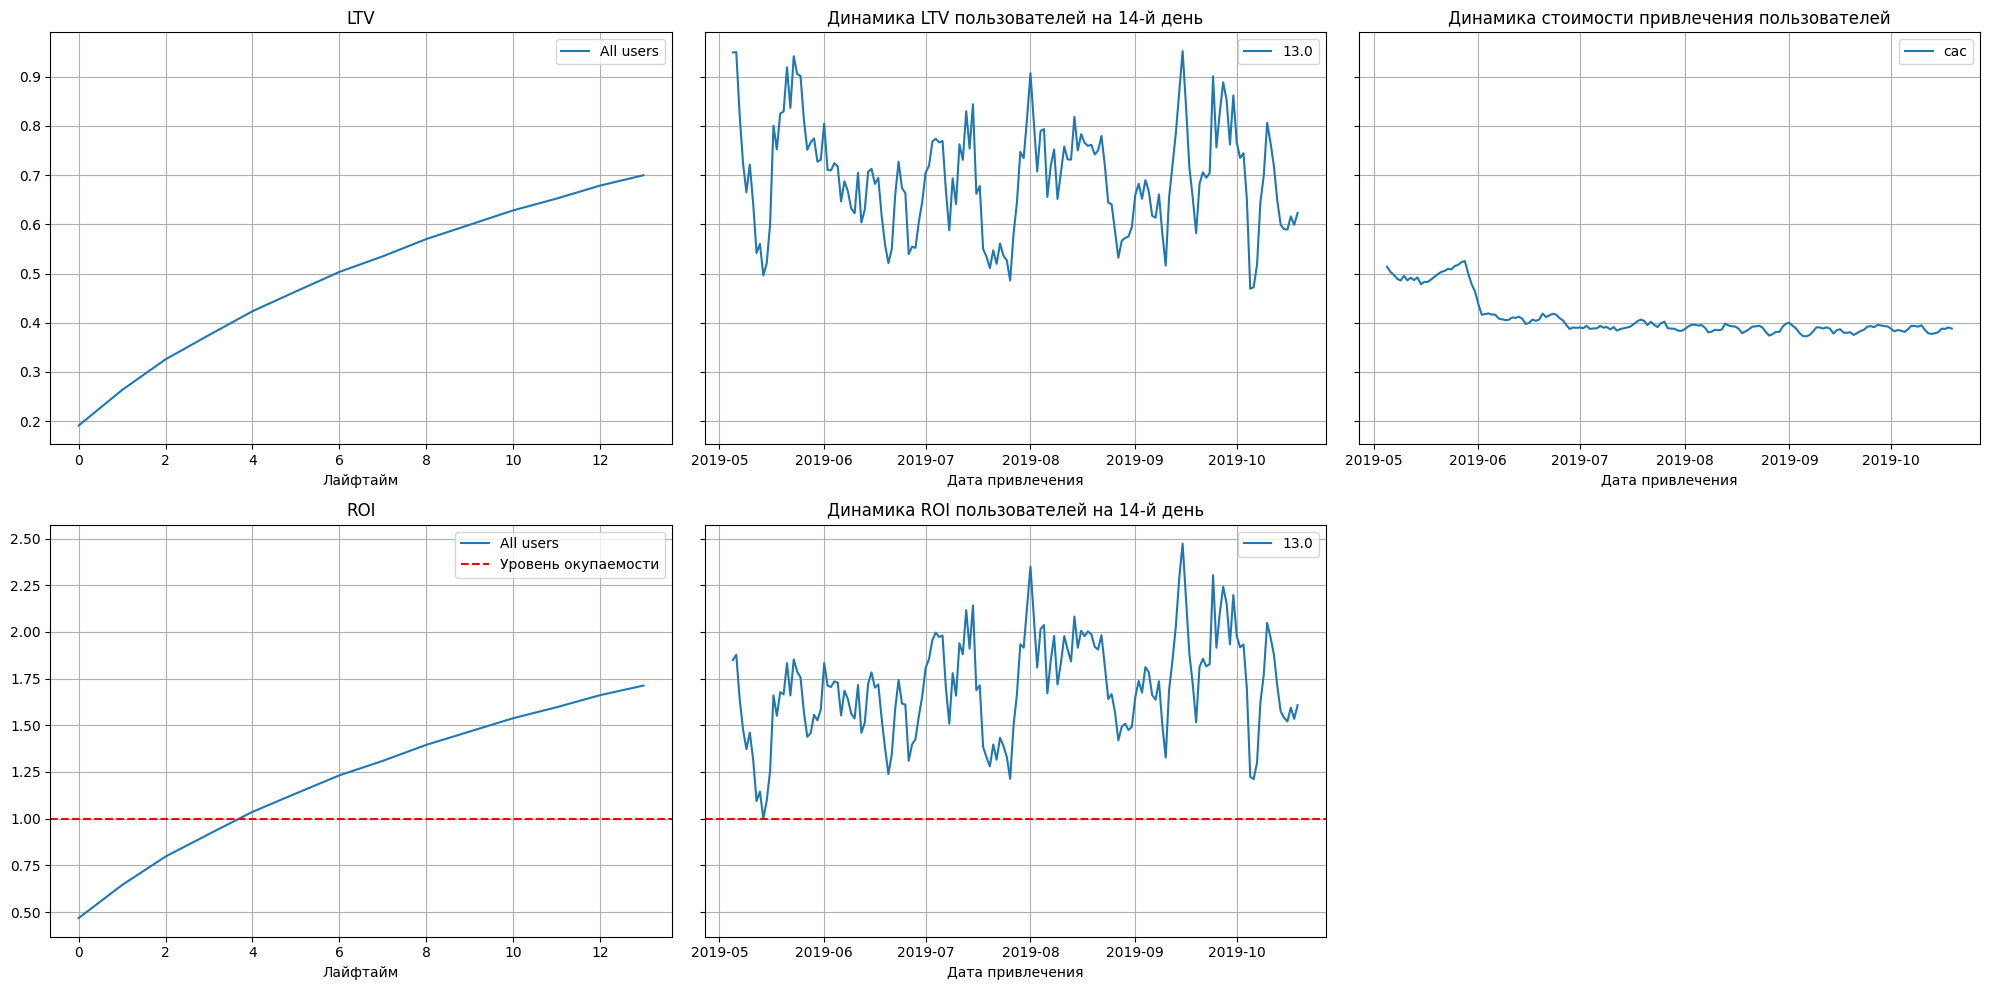

In [49]:
# Вернем наименее влияющий канал "AdNonSense" и посмотрим, как поведут себя показтели
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles.query('channel not in ["TipTop", "FaceBoom", "organic"]'), 
                                                         orders, observation_date, horizon_days)

# Визуализируем полученные показатели на графиках
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=5)

<div style="border:solid Green 2px; padding: 20px">

Несмотря на небольшую сумму вложенных средств в канал "AdNonSense" - его влияние сразу же отмечается на графиках: ROI снизилось с 2 до 1.75, а на графике динамики отмечаются падения, которые сильно приближаются к уровню окупаемости. Также выросла стоимость привлечения пользователей.
    
**Вывод:**    
Таким образом подтверждается негативное влияние даже не масштабных, но отрицательных каналов, не говоря уже про ранее выявленных лидеров.

### Выводы и рекомендации

<div style="border:solid Green 2px; padding: 20px">

**Вывод:** На основании проведенного анализа и моделирования можно сделать следующие заключения:   
    
1. Больше всего пользователей привлечено из США: 100 тысяч, из которых платящих пользователей - почти 7%.
    
2. Лидирующее устройство по количеству первых сессий это iPhone - значительный отрыв в количестве привлеченны пользователей, а также высокая доля платящих пользователей: более 6%. Хуже всего себя показывает ПК - самая низкая доля платящих пользователей, а также нижняя граница по количеству привлеченных пользователей.

3. Всего пользователи приходят по 10 каналам привлечения. Лидером является канал FaceBoom: значительный отрыв по количеству как привлеченных пользователей, так и платящих пользователей. Также хорошие показатели имеет TipTop.
    
4. Органические пользователи показывают неплохой результат в сравнении с платными каналами, если оценивать по количеству платящих пользователей, однако конверсия в платящих пользователей крайне мала.

5. Больше всего (порядка 85%) маркетинговых затрат идет на 2 рекламные компании: "TipTop" и "FaceBoom". Важным фактором является значительная тенденция к росту стоимости у данных каналов.

6. Отмечается рост стоимости привлечения пользователей, что в значительной степени сказывается на ROI. Реклама окупается только на 80% к концу второй недели, а положительная зона динамики ROI отмечается в самом начале временного периода и очень быстро стремится в зону убыточную.   
    
7. По итогу анализа показателей конверсии, удержания, LTV, ROI и CAC в разрезе по каналам, странам и устройствам, определены причины убыточности маркетинга - неэффективные услуги каналов привлечения "TipTop", "FaceBoom" и "AdNonSense", которые не окупаются продажами, посредственная конверсия в Германии, Великобритании и Франции и низкая конверсия на компьютерах, а также средний уровень удержания пользователей в приложении.   
    
**Рекомендации:**    
    
1. Необходимы маркетинговые переговоры с тремя рекламными компаниями "TipTop", "FaceBoom" и "AdNonSense" с целью определения возможностей снижения стоимости рекламы или повышения ее эффективности: 
    
- TipTop: Отмечается постоянно растущая стоимость услуг, которая, несмотря на хорошие показатели конверсии и удержания, не окупается продажами.

- FaceBoom: Выявлены очень низкий процент удержания клиентов и высокая стоимость услуг - хоть компания и характеризуется превосходной конверсией, изначально дорогая стоимость рекламы и малое количество оставшихся клиентов не окупают вложения в рекламу.

- AdNonSense: Низкий процент удержания клиентов и высокая стоимость услуг. Это компания "среднячок" - она имеет все средние показатели и ничем не выделяется. Снизив стоимость услуг, или повысив удержание, данная компания может стать потенциально рентабельной для бизнеса.
    
*Учитывая проведенное моделирование, в случае невозможности достижения договоренностей с данными компаниями, следует рассмотреть полный отказ от сотрудничества с ними, ввиду негативного влияния на бизнес - показатели.*
    
2. Необходимо определить возможности для повышения уровня конверсии в Германии, Великобритании и Франции, который составляет порядка 5% к концу второй недели. Возможна адаптация приложения, его тонкая настройка, изменение условий или добавление акции для первой покупки.
    
3. Низкий уровень конверсии на ПК - необходимо проверить логи ошибок и детально разобраться с приложением на ПК, чтобы определить причины пониженного уровня. Возможно приложение не адаптирвоано для компютера, или интуитивно не понятно - так как удержание пользователей с ПК несколько выше, можно предположить о том, что если пользователь разобрался в приложении, тогда он останется в нем на длительный срок. Необходимо проверить воронки конверсии по шагам для пользователей и сравнить их с показателями на других устройствах, чтобы найти узкие места.
    
4. Определить возможности для повышения уровня удержания пользователей по всем направлениям: добавление акций для уже зарегистрированных пользователей или другие привилегии для привлечения их в приложение.
    
**Усиление маркетинга:**
    
1. Основную долю клиентов в приложении составляют пользователи из США, однако не все каналы там окупаются. Следует оптимизировать распределение средств и больше внимания уделить кампаниям YRabbit, MediaTornado и RocketSuperAds, причем последней отдать приоритет: здесь низкая стоимость услуг при эффективных показателях конверсии, удержания и окупаемости.
    
2. В Европейских странах необходимо сделать упор на компанию LambdaMediaAds - обладая малой стоимостью услуг, данная компания характеризуется отличной эффективностью: рекордная окупаемость, высокий уровень конверсии и сопоставимый конкурентам уровень удержания. Очень хорошие показатели!